<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/Dados_Covid_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importação e configuração para o padrão Seaborn
import seaborn as sns
sns.set()

# **Carregar os dados**



In [2]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregando os dados parte 1 estado de Goiás 
df_GO = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-GO.csv',sep=';',low_memory=False)
df_MS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-MS.csv',sep=';',low_memory=False)
df_MT = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1=MT.csv',sep=';',low_memory=False)
df_DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-DF.csv',sep=';',low_memory=False)

# **Tratamento dos dados - Goiás**

> Estado de Goiás



IBGE - População estimada de Goiás

7.206.589
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/go.html

In [4]:
# mostra os nomes das colunas
df_GO.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [5]:
# Selecionar 3 colunas para a primeira análise
df_GO1 = df_GO.iloc[: , [0,28,30]]
df_GO1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,1ab7f230-bff6-4e3b-972e-fc8e075c61c3-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
1,11812484-aafd-4025-941b-89980899edfd-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
2,1abef6b1-d0ca-469d-abdc-cb3a4b33fe6e-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
3,1186cfb4-f569-4960-881a-ff0045e4a7dc-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
4,1ac2e3b7-a6a7-4695-9ae2-e0e32ddb68d9-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY


In [6]:
df_GO1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                1926585
1ª Dose Revacinação          1
2ª Dose                1669493
2º Reforço              144185
3ª Dose                      1
3º Reforço                 256
Dose                     54263
Dose Adicional           58903
Dose Inicial                 1
Reforço                 793509
Name: document_id, dtype: int64

In [7]:
# Selecionar 7 colunas para a segunda análise
df_GO2 = df_GO.iloc[: , [0,2,20,21,22,23,30]]
df_GO2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,1ab7f230-bff6-4e3b-972e-fc8e075c61c3-i0b0,47.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
1,11812484-aafd-4025-941b-89980899edfd-i0b0,64.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
2,1abef6b1-d0ca-469d-abdc-cb3a4b33fe6e-i0b0,48.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
3,1186cfb4-f569-4960-881a-ff0045e4a7dc-i0b0,19.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
4,1ac2e3b7-a6a7-4695-9ae2-e0e32ddb68d9-i0b0,61.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY


In [8]:
# Selecionar 7 colunas para a segunda análise
df_GO3 = df_GO.iloc[: , [27,28]]
df_GO3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-09-28,2ª Dose
1,2021-12-07,Reforço
2,2022-02-01,Reforço
3,2021-08-23,1ª Dose
4,2021-12-20,Reforço


In [9]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_GO3[['vacina_dataAplicacao']] = df_GO3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
#Confirmando se trocou de tipo
df_GO3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [11]:
df_GO3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-09-28,2ª Dose
1,2021-12-07,Reforço
2,2022-02-01,Reforço
3,2021-08-23,1ª Dose
4,2021-12-20,Reforço


In [12]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_GO3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
426115,2021-01-01,1ª Dose
3637039,2021-01-12,1ª Dose
1713523,2021-01-12,1ª Dose
698274,2021-01-12,1ª Dose
417987,2021-01-12,1ª Dose
...,...,...
940315,2022-06-25,2º Reforço
4595137,2022-06-25,2º Reforço
19300,2022-06-25,2º Reforço
1674295,2022-06-25,3º Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [13]:
df_21_GO3_mes1 = df_GO3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_GO3_mes2 = df_GO3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_GO3_mes3 = df_GO3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_GO3_mes4 = df_GO3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_GO3_mes5 = df_GO3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_GO3_mes6 = df_GO3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [14]:
df_21_GO3_mes7 = df_GO3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_GO3_mes8 = df_GO3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_GO3_mes9 = df_GO3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_GO3_mes10 = df_GO3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_GO3_mes11 = df_GO3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_GO3_mes12 = df_GO3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês ( Janeiro até Junho ) as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [15]:
df_22_GO3_mes1 = df_GO3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_GO3_mes2 = df_GO3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_GO3_mes3 = df_GO3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_GO3_mes4 = df_GO3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_GO3_mes5 = df_GO3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_GO3_mes6 = df_GO3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-25'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [16]:
df_21_GO3_mes1.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,31799
2ª Dose,55
Dose Adicional,3
Reforço,2


In [17]:
df_21_GO3_mes1count = df_21_GO3_mes1.groupby('vacina_descricao_dose').count()
df_21_GO3_mes2count = df_21_GO3_mes2.groupby('vacina_descricao_dose').count()
df_21_GO3_mes3count = df_21_GO3_mes3.groupby('vacina_descricao_dose').count()
df_21_GO3_mes4count = df_21_GO3_mes4.groupby('vacina_descricao_dose').count()
df_21_GO3_mes5count = df_21_GO3_mes5.groupby('vacina_descricao_dose').count()
df_21_GO3_mes6count = df_21_GO3_mes6.groupby('vacina_descricao_dose').count()

In [18]:
df_21_GO3_mes7count = df_21_GO3_mes7.groupby('vacina_descricao_dose').count()
df_21_GO3_mes8count = df_21_GO3_mes8.groupby('vacina_descricao_dose').count()
df_21_GO3_mes9count = df_21_GO3_mes9.groupby('vacina_descricao_dose').count()
df_21_GO3_mes10count = df_21_GO3_mes10.groupby('vacina_descricao_dose').count()
df_21_GO3_mes11count = df_21_GO3_mes11.groupby('vacina_descricao_dose').count()
df_21_GO3_mes12count = df_21_GO3_mes12.groupby('vacina_descricao_dose').count()

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2022

In [19]:
df_22_GO3_mes1count = df_22_GO3_mes1.groupby('vacina_descricao_dose').count()
df_22_GO3_mes2count = df_22_GO3_mes2.groupby('vacina_descricao_dose').count()
df_22_GO3_mes3count = df_22_GO3_mes3.groupby('vacina_descricao_dose').count()
df_22_GO3_mes4count = df_22_GO3_mes4.groupby('vacina_descricao_dose').count()
df_22_GO3_mes5count = df_22_GO3_mes5.groupby('vacina_descricao_dose').count()
df_22_GO3_mes6count = df_22_GO3_mes6.groupby('vacina_descricao_dose').count()

In [20]:
GO_Vacina_Mes_1_21 = pd.merge(df_21_GO3_mes1count, df_21_GO3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
GO_Vacina_Mes_2_21 = pd.merge(GO_Vacina_Mes_1_21, df_21_GO3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
GO_Vacina_Mes_3_21 = pd.merge(GO_Vacina_Mes_2_21, df_21_GO3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
GO_Vacina_Mes_4_21 = pd.merge(GO_Vacina_Mes_3_21, df_21_GO3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
GO_Vacina_Mes_5_21 = pd.merge(GO_Vacina_Mes_4_21, df_21_GO3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
GO_Vacina_Mes_6_21 = pd.merge(GO_Vacina_Mes_5_21, df_21_GO3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [21]:
GO_Vacina_Mes_7_21 = pd.merge(GO_Vacina_Mes_6_21, df_21_GO3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
GO_Vacina_Mes_8_21 = pd.merge(GO_Vacina_Mes_7_21, df_21_GO3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
GO_Vacina_Mes_9_21 = pd.merge(GO_Vacina_Mes_8_21, df_21_GO3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
GO_Vacina_Mes_10_21 = pd.merge(GO_Vacina_Mes_9_21, df_21_GO3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
GO_Vacina_Mes_11_21 = pd.merge(GO_Vacina_Mes_10_21, df_21_GO3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [22]:
GO_Vacina_Mes_1_22 = pd.merge(GO_Vacina_Mes_11_21, df_22_GO3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
GO_Vacina_Mes_2_22 = pd.merge(GO_Vacina_Mes_1_22, df_22_GO3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
GO_Vacina_Mes_3_22 = pd.merge(GO_Vacina_Mes_2_22, df_22_GO3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
GO_Vacina_Mes_4_22 = pd.merge(GO_Vacina_Mes_3_22, df_22_GO3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
GO_Vacina_Mes_5_22 = pd.merge(GO_Vacina_Mes_4_22, df_22_GO3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '__mes5_22'))
GO_Vacina_Mes_6_22 = pd.merge(GO_Vacina_Mes_5_22, df_22_GO3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [23]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
GO_Vacina_Mes_6_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,vacina_dataAplicacao_mes11_21,vacina_dataAplicacao_mes12_21,vacina_dataAplicacao_mes1_22,vacina_dataAplicacao_mes2_22,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,
1ª Dose,31799.0,43819.0,141225.0,112430.0,183179.0,294748.0,265555.0,375199.0,174715.0,84729.0,40764.0,24276.0,48069.0,63544.0,20953.0,9321.0,6918.0,5342.0
2ª Dose,55.0,23494.0,29754.0,129382.0,43455.0,22604.0,134216.0,220690.0,284021.0,232773.0,242796.0,130431.0,53681.0,25758.0,36842.0,30222.0,18753.0,10566.0
Dose Adicional,3.0,5.0,5.0,NaN,NaN,3.0,6.0,4.0,1412.0,4728.0,2016.0,6403.0,11390.0,11004.0,8189.0,5680.0,4173.0,3882.0
Reforço,2.0,4.0,6.0,3.0,3.0,4.0,19.0,52.0,9873.0,76418.0,69269.0,109428.0,182347.0,114565.0,99786.0,51056.0,38581.0,42093.0
Dose,NaN,NaN,2.0,7.0,6.0,13169.0,34938.0,3811.0,124.0,188.0,69.0,231.0,205.0,128.0,197.0,386.0,398.0,404.0
2º Reforço,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,3.0,2.0,24.0,32.0,47.0,2736.0,44283.0,35161.0,61894.0
Dose Inicial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3ª Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [24]:
# Transposta do DataFrame Vacina_Mes_11
GO_Vacina_Mes_6_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,Dose,2º Reforço,Dose Inicial,1ª Dose Revacinação,3ª Dose,3º Reforço
vacina_dataAplicacao_mes1_21,31799.0,55.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,43819.0,23494.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,141225.0,29754.0,5.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,112430.0,129382.0,NaN,3.0,7.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,183179.0,43455.0,NaN,3.0,6.0,1.0,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,294748.0,22604.0,3.0,4.0,13169.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,265555.0,134216.0,6.0,19.0,34938.0,1.0,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,375199.0,220690.0,4.0,52.0,3811.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,174715.0,284021.0,1412.0,9873.0,124.0,1.0,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,84729.0,232773.0,4728.0,76418.0,188.0,3.0,NaN,NaN,NaN,NaN


In [25]:
#Susbtituir os valores NaN por 0
GO_Count_Mes_Dose = GO_Vacina_Mes_6_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 pelos respectivos meses e anos

In [26]:
GO_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022"]

In [27]:
GO_Count_Mes = df_GO3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Mato Grosso**

> Estado de Mato Grosso



In [28]:
df_MT

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,1900678f-fe57-4589-a764-26899a85df67-i0b0,d4f25c487ac0f5d24bd54a215c22708d21b7c556f8bfd1...,76.0,1944-07-16,M,99.0,SEM INFORMACAO,510030,10,ALTO ARAGUAIA,...,2.0,Faixa Etária,210058,SINOVAC/BUTANTAN,Organization/61189445000156,2021-04-14,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
1,1116eab8-2562-4134-906e-6b787a2bc211-i0b0,29a673b6349b6e7e40d9a90db4d0c0966cb62cb82c5b8f...,25.0,1995-10-18,M,3.0,PARDA,510267,10,CAMPO VERDE,...,2.0,Faixa Etária,210323,SINOVAC/BUTANTAN,Organization/61189445000156,2021-08-03,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2,19016650-cd16-4610-aa70-435e73dd0e49-i0b0,e269bd1ac407eae4662cee697e0c57c0a0c8079370173d...,19.0,2002-02-06,F,3.0,PARDA,510790,10,SINOP,...,2.0,Faixa Etária,FF8844,PFIZER,Organization/00394544000851,2021-09-22,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
3,1134c1f4-444c-457f-9f3f-92fac214dd92-i0b0,47969f8e670e4c4b6c2ed6ce1fff4dbdca738815cd0b7b...,25.0,1995-04-28,F,1.0,BRANCA,510340,10,CUIABA,...,9.0,Trabalhadores de Saúde,202009014,SINOVAC/BUTANTAN,Organization/61189445000156,2021-01-27,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
4,1905de05-c391-4dc3-abe6-13f404275d21-i0b0,f9071993f4545c2229fbf7969c7cd7ed94780cc3984ed9...,13.0,2008-07-10,M,4.0,AMARELA,510170,10,BARRA DO BUGRES,...,2.0,Faixa Etária,B202106075,SINOVAC/BUTANTAN,Organization/152,2022-06-10,Reforço,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122336,09a7138e-c44a-4e40-b698-2d81320d049a-i0b0,68ce32080c79684d425006c6e1061e7b1f5776925f5435...,52.0,1969-02-16,M,1.0,BRANCA,510790,10,SINOP,...,2.0,Faixa Etária,FF8844,PFIZER,Organization/00394544000851,2021-09-29,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2122337,09aeec76-84bf-4f58-a825-698313430796-i0b0,90341ef6b9746389d83eae9e34cb09d2ba3549513e2689...,52.0,1969-04-25,M,4.0,AMARELA,510600,10,NORTELANDIA,...,2.0,Faixa Etária,217VCD230Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-09-14,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
2122338,09c0523a-c881-4c84-b684-f103cbb6f3e0-i0b0,5d7ef71987a51b0211e3252bb38398b55b0a5ea68ffbcb...,32.0,1989-06-04,M,4.0,AMARELA,510340,10,CUIABA,...,2.0,Faixa Etária,FF5108,PFIZER,Organization/28290,2022-01-04,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2122339,09c59300-4627-460c-9184-226b139b1043-i0b0,44bc237215c3616779c97104551d0834998aa3604a17d4...,17.0,2004-06-16,M,3.0,PARDA,510800,10,TAPURAH,...,2.0,Faixa Etária,FF8846,PFIZER,Organization/00394544000851,2021-09-25,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada de Mato Grosso

3.567.234
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/mt.html

In [29]:
# mostra os nomes das colunas
df_MT.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [30]:
# Selecionar 3 colunas para a primeira análise
df_MT1 = df_MT.iloc[: , [0,28,30]]
df_MT1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,1900678f-fe57-4589-a764-26899a85df67-i0b0,2ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
1,1116eab8-2562-4134-906e-6b787a2bc211-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
2,19016650-cd16-4610-aa70-435e73dd0e49-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
3,1134c1f4-444c-457f-9f3f-92fac214dd92-i0b0,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
4,1905de05-c391-4dc3-abe6-13f404275d21-i0b0,Reforço,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [31]:
df_MT1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                924849
1ª Dose Revacinação        67
1º Reforço                 25
2ª Dose                785579
2ª Dose Revacinação         3
2º Reforço              39965
3ª Dose                  1631
3º Reforço                214
4ª Dose                    73
Dose                    31898
Dose Adicional          27973
Dose Inicial                1
Reforço                309999
Única                      64
Name: document_id, dtype: int64

In [32]:
# Selecionar 7 colunas para a segunda análise
df_MT2 = df_MT.iloc[: , [0,2,20,21,22,23,30]]
df_MT2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,1900678f-fe57-4589-a764-26899a85df67-i0b0,76.0,204.0,Pessoas de 75 a 79 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
1,1116eab8-2562-4134-906e-6b787a2bc211-i0b0,25.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
2,19016650-cd16-4610-aa70-435e73dd0e49-i0b0,19.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
3,1134c1f4-444c-457f-9f3f-92fac214dd92-i0b0,25.0,920.0,Recepcionista,9.0,Trabalhadores de Saúde,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
4,1905de05-c391-4dc3-abe6-13f404275d21-i0b0,13.0,206.0,Pessoas de 12 a 17 anos,2.0,Faixa Etária,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [33]:
# Selecionar 7 colunas para a segunda análise
df_MT3 = df_MT.iloc[: , [27,28]]
df_MT3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-04-14,2ª Dose
1,2021-08-03,1ª Dose
2,2021-09-22,1ª Dose
3,2021-01-27,1ª Dose
4,2022-06-10,Reforço


In [34]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_MT3[['vacina_dataAplicacao']] = df_MT3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
#Confirmando se trocou de tipo
df_MT3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [36]:
df_MT3

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-04-14,2ª Dose
1,2021-08-03,1ª Dose
2,2021-09-22,1ª Dose
3,2021-01-27,1ª Dose
4,2022-06-10,Reforço
...,...,...
2122336,2021-09-29,2ª Dose
2122337,2021-09-14,2ª Dose
2122338,2022-01-04,2ª Dose
2122339,2021-09-25,1ª Dose


In [37]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_MT3 = df_MT3.sort_values(by=['vacina_dataAplicacao'])

In [38]:
indexValoresExcluidos = df_MT3[ (df_MT3['vacina_dataAplicacao'] < '2020-01-01')].index
df_MT3.drop(indexValoresExcluidos , inplace=True)

In [39]:
df_MT3

,vacina_dataAplicacao,vacina_descricao_dose
983935,2020-11-17,Única
1292158,2020-11-18,Única
432388,2020-11-19,Única
1109634,2020-11-19,Única
1054902,2020-11-19,Única
...,...,...
1717862,2022-06-25,2º Reforço
32385,2022-06-25,2ª Dose
1482202,2022-06-25,1ª Dose
73639,2022-06-25,Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2020 e salvamos em diferentes DataFrames

In [40]:
df_20_MT3_mes11 = df_MT3.query(" vacina_dataAplicacao >= '2020-11-01' and vacina_dataAplicacao <= '2020-11-30'")
df_20_MT3_mes12 = df_MT3.query(" vacina_dataAplicacao >= '2020-12-01' and vacina_dataAplicacao <= '2020-12-31'")

Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [41]:
df_21_MT3_mes1 = df_MT3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_MT3_mes2 = df_MT3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_MT3_mes3 = df_MT3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_MT3_mes4 = df_MT3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_MT3_mes5 = df_MT3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_MT3_mes6 = df_MT3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [42]:
df_21_MT3_mes7 = df_MT3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_MT3_mes8 = df_MT3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_MT3_mes9 = df_MT3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_MT3_mes10 = df_MT3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_MT3_mes11 = df_MT3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_MT3_mes12 = df_MT3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [43]:
df_22_MT3_mes1 = df_MT3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_MT3_mes2 = df_MT3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_MT3_mes3 = df_MT3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_MT3_mes4 = df_MT3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_MT3_mes5 = df_MT3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_MT3_mes6 = df_MT3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-25'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [44]:
df_22_MT3_mes6.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,3213
2ª Dose,5530
2º Reforço,27405
3ª Dose,113
3º Reforço,213
4ª Dose,57
Dose,228
Dose Adicional,3193
Reforço,19409


In [45]:
df_20_MT3_mes11count = df_20_MT3_mes11.groupby('vacina_descricao_dose').count()
df_20_MT3_mes12count = df_20_MT3_mes12.groupby('vacina_descricao_dose').count()

In [46]:
df_21_MT3_mes1count = df_21_MT3_mes1.groupby('vacina_descricao_dose').count()
df_21_MT3_mes2count = df_21_MT3_mes2.groupby('vacina_descricao_dose').count()
df_21_MT3_mes3count = df_21_MT3_mes3.groupby('vacina_descricao_dose').count()
df_21_MT3_mes4count = df_21_MT3_mes4.groupby('vacina_descricao_dose').count()
df_21_MT3_mes5count = df_21_MT3_mes5.groupby('vacina_descricao_dose').count()
df_21_MT3_mes6count = df_21_MT3_mes6.groupby('vacina_descricao_dose').count()

In [47]:
df_21_MT3_mes7count = df_21_MT3_mes7.groupby('vacina_descricao_dose').count()
df_21_MT3_mes8count = df_21_MT3_mes8.groupby('vacina_descricao_dose').count()
df_21_MT3_mes9count = df_21_MT3_mes9.groupby('vacina_descricao_dose').count()
df_21_MT3_mes10count = df_21_MT3_mes10.groupby('vacina_descricao_dose').count()
df_21_MT3_mes11count = df_21_MT3_mes11.groupby('vacina_descricao_dose').count()
df_21_MT3_mes12count = df_21_MT3_mes12.groupby('vacina_descricao_dose').count()

In [48]:
df_22_MT3_mes1count = df_22_MT3_mes1.groupby('vacina_descricao_dose').count()
df_22_MT3_mes2count = df_22_MT3_mes2.groupby('vacina_descricao_dose').count()
df_22_MT3_mes3count = df_22_MT3_mes3.groupby('vacina_descricao_dose').count()
df_22_MT3_mes4count = df_22_MT3_mes4.groupby('vacina_descricao_dose').count()
df_22_MT3_mes5count = df_22_MT3_mes5.groupby('vacina_descricao_dose').count()
df_22_MT3_mes6count = df_22_MT3_mes6.groupby('vacina_descricao_dose').count()

Colocando todos os dataframes em um único só

In [49]:
MT_Vacina_Mes_11_20 = pd.merge(df_20_MT3_mes11count, df_20_MT3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_20', '_mes12_20'))
MT_Vacina_Mes_12_20 = pd.merge(MT_Vacina_Mes_11_20, df_21_MT3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_20', '_mes1_21'))

In [50]:
MT_Vacina_Mes_1_21 = pd.merge(MT_Vacina_Mes_12_20, df_21_MT3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
MT_Vacina_Mes_2_21 = pd.merge(MT_Vacina_Mes_1_21, df_21_MT3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
MT_Vacina_Mes_3_21 = pd.merge(MT_Vacina_Mes_2_21, df_21_MT3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
MT_Vacina_Mes_4_21 = pd.merge(MT_Vacina_Mes_3_21, df_21_MT3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
MT_Vacina_Mes_5_21 = pd.merge(MT_Vacina_Mes_4_21, df_21_MT3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
MT_Vacina_Mes_6_21 = pd.merge(MT_Vacina_Mes_5_21, df_21_MT3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [51]:
MT_Vacina_Mes_7_21 = pd.merge(MT_Vacina_Mes_6_21, df_21_MT3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
MT_Vacina_Mes_8_21 = pd.merge(MT_Vacina_Mes_7_21, df_21_MT3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
MT_Vacina_Mes_9_21 = pd.merge(MT_Vacina_Mes_8_21, df_21_MT3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
MT_Vacina_Mes_10_21 = pd.merge(MT_Vacina_Mes_9_21, df_21_MT3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
MT_Vacina_Mes_11_21 = pd.merge(MT_Vacina_Mes_10_21, df_21_MT3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [52]:
MT_Vacina_Mes_1_22 = pd.merge(MT_Vacina_Mes_11_21, df_22_MT3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
MT_Vacina_Mes_2_22 = pd.merge(MT_Vacina_Mes_1_22, df_22_MT3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
MT_Vacina_Mes_3_22 = pd.merge(MT_Vacina_Mes_2_22, df_22_MT3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
MT_Vacina_Mes_4_22 = pd.merge(MT_Vacina_Mes_3_22, df_22_MT3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
MT_Vacina_Mes_5_22 = pd.merge(MT_Vacina_Mes_4_22, df_22_MT3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
MT_Vacina_Mes_6_22 = pd.merge(MT_Vacina_Mes_5_22, df_22_MT3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [53]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
MT_Vacina_Mes_6_22

,vacina_dataAplicacao_mes11_20,vacina_dataAplicacao_mes12_20,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,vacina_dataAplicacao_mes11_21,vacina_dataAplicacao_mes12_21,vacina_dataAplicacao_mes1_22,vacina_dataAplicacao_mes2_22,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,
Única,11.0,2.0,NaN,NaN,15.0,NaN,NaN,NaN,17.0,11.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,1.0,2.0
1ª Dose,NaN,NaN,16415.0,16552.0,40132.0,71812.0,70844.0,124153.0,176063.0,157800.0,81581.0,65317.0,23001.0,13279.0,16063.0,30939.0,10451.0,4438.0,2794.0,3213.0
2ª Dose,NaN,NaN,24.0,14781.0,11206.0,43549.0,31228.0,10582.0,51419.0,92571.0,144858.0,149161.0,96726.0,62404.0,23607.0,13548.0,16030.0,11632.0,6722.0,5530.0
Dose,NaN,NaN,1.0,NaN,3.0,1.0,NaN,2493.0,26460.0,1038.0,989.0,73.0,3.0,21.0,70.0,68.0,138.0,142.0,170.0,228.0
Dose Adicional,NaN,NaN,3.0,6.0,2.0,1.0,NaN,3.0,3.0,1.0,421.0,1949.0,1425.0,3019.0,4739.0,3775.0,4812.0,2274.0,2347.0,3193.0
Reforço,NaN,NaN,16.0,2.0,5.0,3.0,2.0,2.0,2.0,8.0,1892.0,26579.0,24429.0,40621.0,70241.0,54921.0,42632.0,16699.0,12536.0,19409.0
2º Reforço,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,108.0,24.0,620.0,1922.0,9881.0,27405.0
1ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Transposta do DataFrame Vacina_Mes_11
MT_Vacina_Mes_6_22.T

vacina_descricao_dose,Única,1ª Dose,2ª Dose,Dose,Dose Adicional,Reforço,2º Reforço,1ª Dose Revacinação,2ª Dose Revacinação,3ª Dose,1º Reforço,Dose Inicial,3º Reforço,4ª Dose
vacina_dataAplicacao_mes11_20,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes12_20,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes1_21,NaN,16415.0,24.0,1.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,NaN,16552.0,14781.0,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,15.0,40132.0,11206.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,NaN,71812.0,43549.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,NaN,70844.0,31228.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,NaN,124153.0,10582.0,2493.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,17.0,176063.0,51419.0,26460.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,11.0,157800.0,92571.0,1038.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Susbtituir os valores NaN por 0
MT_Count_Mes_Dose = MT_Vacina_Mes_6_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 pelos respectivos meses e anos

In [56]:
MT_Count_Mes_Dose.index = ["Novembro-2020","Dezembro-2020","Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022"]

In [57]:
MT_Count_Mes = df_MT3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Mato Grosso do Sul**

> Estado de Mato Grosso do Sul



In [58]:
df_MS

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,1077ba62-6867-4f83-b9d4-89775e0c00c2-i0b0,d8af1560db580e27681948fe9a86c0232519c98d8a4c91...,66,1955-08-22,F,1,BRANCA,500370,10,DOURADOS,...,2.0,Faixa Etária,FG3528,PFIZER,Organization/00394544000851,2021-09-25,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
1,1f8c7d9b-233f-4743-8b6c-885e136ddd94-i0b0,4b2b2648c7772564831caa690281b95926ef7e69b05762...,49,1972-11-10,M,1,BRANCA,500370,10,DOURADOS,...,10.0,Trabalhadores de Transporte,219VCD273Z,ASTRAZENECA/FIOCRUZ,Organization/149,2021-12-13,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
2,87316981-036c-4e23-87d3-335a5b698cb7-i0b0,55014308dd7c5ba34dcab8b82ba9e363bf1358d70e6eb7...,56,1964-11-08,F,1,BRANCA,500270,10,CAMPO GRANDE,...,9.0,Trabalhadores de Saúde,214VCD096Z,ASTRAZENECA/FIOCRUZ,NaN,2021-05-29,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Vacina Campo Grande
3,1f8c8200-ced2-43c5-8085-ffae2842ff8e-i0b0,b81728ba1eb7390c95408b16bb68e39fd84709bdc1f142...,59,1961-10-02,F,1,BRANCA,500270,10,CAMPO GRANDE,...,9.0,Trabalhadores de Saúde,215VCD135W,ASTRAZENECA/FIOCRUZ,NaN,2021-06-24,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Vacina Campo Grande
4,97ce3f3d-b0e3-40eb-91a0-f356bb8bf53c-i0b0,4338ef14563bd414bd4109573514a2947155cc5f0f970f...,42,1978-09-29,F,3,PARDA,500200,10,BATAYPORA,...,1.0,Comorbidades,215VCD135W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-29,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921828,10f553f9-845e-4d4c-a7d1-4fe78a26f48d-i0b0,8bc8c6c10e022053364207f4de6c84a243766dbb1cd2f1...,40,1981-06-29,F,1,BRANCA,500600,10,NOVA ALVORADA DO SUL,...,2.0,Faixa Etária,218VCD261Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-09-24,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1921829,111fcfeb-57bd-483e-bd5c-435e4c32ac13-i0b0,766d4e83408c49b7139112495fb5f7452168f277f5e3c7...,53,1967-11-22,M,99,SEM INFORMACAO,500270,10,CAMPO GRANDE,...,9.0,Trabalhadores de Saúde,215VCD123W,ASTRAZENECA/FIOCRUZ,NaN,2021-06-03,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Vacina Campo Grande
1921830,11233861-9f52-4a2f-b709-3ceabd333e5a-i0b0,cdf8bb92cc09efc413f6a1b7cacb510197325f2f728a31...,39,1981-09-07,F,1,BRANCA,500620,10,NOVA ANDRADINA,...,2.0,Faixa Etária,216VCD176Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-07,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1921831,1123dcc7-3db6-47dc-bf9c-930863e50e19-i0b0,40904b517c769997a941bcea930e0059c7314e306a049f...,12,2009-08-17,M,1,BRANCA,500540,10,MARACAJU,...,2.0,Faixa Etária,FF8844,PFIZER,Organization/00394544000851,2021-09-10,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada de Mato Grosso do Sul

2.839.188
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/ms.html?

In [59]:
# mostra os nomes das colunas
df_MS.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [60]:
# Selecionar 3 colunas para a primeira análise
df_MS1 = df_MS.iloc[: , [0,28,30]]
df_MS1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,1077ba62-6867-4f83-b9d4-89775e0c00c2-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
1,1f8c7d9b-233f-4743-8b6c-885e136ddd94-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
2,87316981-036c-4e23-87d3-335a5b698cb7-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,1f8c8200-ced2-43c5-8085-ffae2842ff8e-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
4,97ce3f3d-b0e3-40eb-91a0-f356bb8bf53c-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [61]:
df_MS1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                744393
1ª Dose Revacinação        16
2ª Dose                641562
2º Reforço              32865
3ª Dose                132929
3º Reforço                 37
4ª Dose                 35771
Dose                    62206
Dose Adicional          24008
Reforço                248045
Única                       1
Name: document_id, dtype: int64

In [62]:
# Selecionar 7 colunas para a segunda análise
df_MS2 = df_MS.iloc[: , [0,2,20,21,22,23,30]]
df_MS2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,1077ba62-6867-4f83-b9d4-89775e0c00c2-i0b0,66,202.0,Pessoas de 65 a 69 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
1,1f8c7d9b-233f-4743-8b6c-885e136ddd94-i0b0,49,1002.0,Caminhoneiro,10.0,Trabalhadores de Transporte,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
2,87316981-036c-4e23-87d3-335a5b698cb7-i0b0,56,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,1f8c8200-ced2-43c5-8085-ffae2842ff8e-i0b0,59,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
4,97ce3f3d-b0e3-40eb-91a0-f356bb8bf53c-i0b0,42,103.0,Diabetes Mellitus,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [63]:
# Selecionar 7 colunas para a segunda análise
df_MS3 = df_MS.iloc[: , [27,28]]
df_MS3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-09-25,Reforço
1,2021-12-13,2ª Dose
2,2021-05-29,1ª Dose
3,2021-06-24,2ª Dose
4,2021-06-29,2ª Dose


In [64]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_MS3[['vacina_dataAplicacao']] = df_MS3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [65]:
#Confirmando se trocou de tipo
df_MS3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [66]:
df_MS3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-09-25,Reforço
1,2021-12-13,2ª Dose
2,2021-05-29,1ª Dose
3,2021-06-24,2ª Dose
4,2021-06-29,2ª Dose


In [67]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_MS3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
1586231,2020-10-29,1ª Dose
143268,2020-10-29,1ª Dose
862995,2020-10-30,1ª Dose
77596,2020-10-30,1ª Dose
1757477,2020-10-31,1ª Dose
...,...,...
302814,2022-06-25,Dose Adicional
1062426,2022-06-25,2ª Dose
133176,2022-06-25,2º Reforço
1795448,2022-06-25,2º Reforço


Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2020 e salvamos em diferentes DataFrames

In [68]:
df_20_MS3_mes10 = df_MS3.query(" vacina_dataAplicacao >= '2020-10-01' and vacina_dataAplicacao <= '2020-10-31'")
df_20_MS3_mes11 = df_MS3.query(" vacina_dataAplicacao >= '2020-11-01' and vacina_dataAplicacao <= '2020-11-30'")
df_20_MS3_mes12 = df_MS3.query(" vacina_dataAplicacao >= '2020-12-01' and vacina_dataAplicacao <= '2020-12-31'")

Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [69]:
df_21_MS3_mes1 = df_MS3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_MS3_mes2 = df_MS3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_MS3_mes3 = df_MS3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_MS3_mes4 = df_MS3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_MS3_mes5 = df_MS3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_MS3_mes6 = df_MS3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [70]:
df_21_MS3_mes7 = df_MS3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_MS3_mes8 = df_MS3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_MS3_mes9 = df_MS3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_MS3_mes10 = df_MS3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_MS3_mes11 = df_MS3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_MS3_mes12 = df_MS3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [71]:
df_22_MS3_mes1 = df_MS3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_MS3_mes2 = df_MS3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_MS3_mes3 = df_MS3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_MS3_mes4 = df_MS3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_MS3_mes5 = df_MS3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_MS3_mes6 = df_MS3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-30'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [72]:
df_21_MS3_mes1.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,21741
2ª Dose,70
Dose Adicional,3
Reforço,5


In [73]:
df_20_MS3_mes10count = df_20_MS3_mes10.groupby('vacina_descricao_dose').count()
df_20_MS3_mes11count = df_20_MS3_mes11.groupby('vacina_descricao_dose').count()
df_20_MS3_mes12count = df_20_MS3_mes12.groupby('vacina_descricao_dose').count()

In [74]:
df_21_MS3_mes1count = df_21_MS3_mes1.groupby('vacina_descricao_dose').count()
df_21_MS3_mes2count = df_21_MS3_mes2.groupby('vacina_descricao_dose').count()
df_21_MS3_mes3count = df_21_MS3_mes3.groupby('vacina_descricao_dose').count()
df_21_MS3_mes4count = df_21_MS3_mes4.groupby('vacina_descricao_dose').count()
df_21_MS3_mes5count = df_21_MS3_mes5.groupby('vacina_descricao_dose').count()
df_21_MS3_mes6count = df_21_MS3_mes6.groupby('vacina_descricao_dose').count()

In [75]:
df_21_MS3_mes7count = df_21_MS3_mes7.groupby('vacina_descricao_dose').count()
df_21_MS3_mes8count = df_21_MS3_mes8.groupby('vacina_descricao_dose').count()
df_21_MS3_mes9count = df_21_MS3_mes9.groupby('vacina_descricao_dose').count()
df_21_MS3_mes10count = df_21_MS3_mes10.groupby('vacina_descricao_dose').count()
df_21_MS3_mes11count = df_21_MS3_mes11.groupby('vacina_descricao_dose').count()
df_21_MS3_mes12count = df_21_MS3_mes12.groupby('vacina_descricao_dose').count()

In [76]:
df_22_MS3_mes1count = df_22_MS3_mes1.groupby('vacina_descricao_dose').count()
df_22_MS3_mes2count = df_22_MS3_mes2.groupby('vacina_descricao_dose').count()
df_22_MS3_mes3count = df_22_MS3_mes3.groupby('vacina_descricao_dose').count()
df_22_MS3_mes4count = df_22_MS3_mes4.groupby('vacina_descricao_dose').count()
df_22_MS3_mes5count = df_22_MS3_mes5.groupby('vacina_descricao_dose').count()
df_22_MS3_mes6count = df_22_MS3_mes6.groupby('vacina_descricao_dose').count()

In [77]:
MS_Vacina_Mes_10_20 = pd.merge(df_20_MS3_mes10count, df_20_MS3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_20', '_mes11_20'))
MS_Vacina_Mes_11_20 = pd.merge(MS_Vacina_Mes_10_20, df_20_MS3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_20', '_mes12_20'))
MS_Vacina_Mes_12_20 = pd.merge(MS_Vacina_Mes_11_20, df_21_MS3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_20', '_mes1_21'))

In [78]:
MS_Vacina_Mes_1_21 = pd.merge(MS_Vacina_Mes_12_20, df_21_MS3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
MS_Vacina_Mes_2_21 = pd.merge(MS_Vacina_Mes_1_21, df_21_MS3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
MS_Vacina_Mes_3_21 = pd.merge(MS_Vacina_Mes_2_21, df_21_MS3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
MS_Vacina_Mes_4_21 = pd.merge(MS_Vacina_Mes_3_21, df_21_MS3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
MS_Vacina_Mes_5_21 = pd.merge(MS_Vacina_Mes_4_21, df_21_MS3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
MS_Vacina_Mes_6_21 = pd.merge(MS_Vacina_Mes_5_21, df_21_MS3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [79]:
MS_Vacina_Mes_7_21 = pd.merge(MS_Vacina_Mes_6_21, df_21_MS3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
MS_Vacina_Mes_8_21 = pd.merge(MS_Vacina_Mes_7_21, df_21_MS3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
MS_Vacina_Mes_9_21 = pd.merge(MS_Vacina_Mes_8_21, df_21_MS3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
MS_Vacina_Mes_10_21 = pd.merge(MS_Vacina_Mes_9_21, df_21_MS3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
MS_Vacina_Mes_11_21 = pd.merge(MS_Vacina_Mes_10_21, df_21_MS3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))

In [80]:
MS_Vacina_Mes_1_22 = pd.merge(MS_Vacina_Mes_11_21, df_22_MS3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes12_21', '_mes1_22'))
MS_Vacina_Mes_2_22 = pd.merge(MS_Vacina_Mes_1_22, df_22_MS3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
MS_Vacina_Mes_3_22 = pd.merge(MS_Vacina_Mes_2_22, df_22_MS3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
MS_Vacina_Mes_4_22 = pd.merge(MS_Vacina_Mes_3_22, df_22_MS3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
MS_Vacina_Mes_5_22 = pd.merge(MS_Vacina_Mes_4_22, df_22_MS3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
MS_Vacina_Mes_6_22 = pd.merge(MS_Vacina_Mes_5_22, df_22_MS3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [81]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
MS_Vacina_Mes_6_22

,vacina_dataAplicacao_mes10_20,vacina_dataAplicacao_mes11_20,vacina_dataAplicacao_mes12_20,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,...,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,vacina_dataAplicacao_mes11_21,vacina_dataAplicacao_mes12_21,vacina_dataAplicacao_mes1_22,vacina_dataAplicacao_mes2_22,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,,
1ª Dose,6.0,25.0,12.0,21741.0,19388.0,67529.0,63144.0,108561.0,108791.0,98291.0,...,28243.0,12744.0,7706.0,5740.0,23961.0,25153.0,8571.0,2780.0,1602.0,1525.0
2ª Dose,NaN,18.0,23.0,70.0,18330.0,16286.0,41915.0,46681.0,36063.0,79111.0,...,125702.0,61839.0,36178.0,17613.0,11768.0,8080.0,13490.0,9541.0,5068.0,3600.0
Dose Adicional,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,1.0,3.0,...,1278.0,991.0,1223.0,3794.0,3992.0,4952.0,3686.0,1828.0,675.0,1507.0
Reforço,NaN,NaN,NaN,5.0,1.0,2.0,3.0,3.0,5.0,4.0,...,31013.0,17967.0,25960.0,58843.0,49165.0,27209.0,17117.0,8312.0,4386.0,6645.0
2º Reforço,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,1.0,NaN,2.0,5.0,21.0,5682.0,7265.0,7778.0,4925.0,7183.0
4ª Dose,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,326.0,11680.0,8076.0,5626.0,3661.0,6397.0
Dose,NaN,NaN,NaN,NaN,5.0,1.0,2.0,9.0,4296.0,56477.0,...,22.0,14.0,23.0,610.0,20.0,15.0,72.0,5.0,15.0,28.0
Única,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ª Dose,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,2.0,3.0,...,25597.0,11776.0,19318.0,24855.0,24679.0,11433.0,6097.0,2504.0,2390.0,4119.0


In [82]:
# Transposta do DataFrame Vacina_Mes_11
MS_Vacina_Mes_6_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,2º Reforço,4ª Dose,Dose,Única,3ª Dose,1ª Dose Revacinação,3º Reforço
vacina_dataAplicacao_mes10_20,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes11_20,25.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes12_20,12.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes1_21,21741.0,70.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,19388.0,18330.0,2.0,1.0,1.0,1.0,5.0,1.0,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,67529.0,16286.0,2.0,2.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN
vacina_dataAplicacao_mes4_21,63144.0,41915.0,NaN,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,108561.0,46681.0,NaN,3.0,NaN,NaN,9.0,NaN,4.0,NaN,NaN
vacina_dataAplicacao_mes6_21,108791.0,36063.0,1.0,5.0,NaN,NaN,4296.0,NaN,2.0,NaN,NaN
vacina_dataAplicacao_mes7_21,98291.0,79111.0,3.0,4.0,NaN,NaN,56477.0,NaN,3.0,NaN,NaN


In [83]:
#Susbtituir os valores NaN por 0
MS_Count_Mes_Dose = MS_Vacina_Mes_6_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por meses e anos


In [84]:
MS_Count_Mes_Dose.index = ["Outubro-2020","Novembro-2020","Dezembro-2020","Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-20220","Maio-2022","Junho-2022"]

In [85]:
MS_Count_Mes = df_MS3.groupby('vacina_dataAplicacao').count()

# **Tratamento dos dados - Distrito Federal**

> Distrito Federal



In [86]:
df_DF

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,24fe9a7b-560c-475e-81e0-ad0b6b7fa7d8-i0b0,f3c541ba5c53534a6b9e5778ee3542b6a07d58872e2011...,30.0,1991-03-24,F,4.0,AMARELA,530010,10,BRASILIA,...,1.0,Comorbidades,216VCD219W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-08-23,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,21b0a35c-28cf-4a87-aaba-5df2ce0cac55-i0b0,58a057e4042afb717b19cb0085b89aa43b4a46c15e67dc...,52.0,1969-07-23,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,1.0,Comorbidades,FG3535,PFIZER,Organization/28290,2022-01-17,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,250e7617-b0e7-4fba-abae-aa3b02c9151f-i0b0,32d5ec8c804d0d84826ea10b4d85c76859e4cca0a3e143...,41.0,1980-04-23,M,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,9.0,Trabalhadores de Saúde,214VCD064Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-01,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
3,21b5773b-b115-41b4-902c-643639b09b8c-i0b0,cfecbdd2a3238e0df14031e2e61f64394690d3ddb36a2d...,43.0,1978-04-20,F,1.0,BRANCA,230440,10,FORTALEZA,...,9.0,Trabalhadores de Saúde,FG3528,PFIZER,Organization/00394544000851,2021-10-06,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,25129d99-1651-4b6c-ba2a-2192068fdc1b-i0b0,62374d60fc07d0e69ca84847a19761fdf481f35c873355...,57.0,1964-02-12,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,2.0,Faixa Etária,217VCD243Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-09-08,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130782,23677924-ca52-4d80-a4b0-e9a53865874f-i0b0,b803942271aeb7e3f47b257cb5e8b9c129401625d17155...,36.0,1985-03-12,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,2.0,Faixa Etária,FD7221,PFIZER,Organization/00394544000851,2021-07-29,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2130783,2371443a-5a8a-4281-b295-23732cd7c07c-i0b0,148a4f962098c3d498f276b3558fca4775df4190575129...,45.0,1976-04-06,F,1.0,BRANCA,530010,10,BRASILIA,...,8.0,Trabalhadores da Educação,210A21A,JANSSEN,Organization/00394544000851,2021-07-07,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
2130784,237d3869-1d9e-4d0a-adda-ce0b6544a27c-i0b0,deba7487cfa06c28175211ff003ab28cf81eb2bc23bf83...,24.0,1997-07-21,M,2.0,PRETA,530010,10,BRASILIA,...,2.0,Faixa Etária,210370A,SINOVAC/BUTANTAN,Organization/61189445000156,2021-09-11,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2130785,23876e1d-85f5-45fd-b66c-241232a9987f-i0b0,c14ffe609a1c7966a033fb4a547e0c45604e739921da42...,27.0,1994-12-09,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,FK8917,PFIZER,Organization/28290,2022-02-12,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada do Distrito Federal

3.094.325
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/df/.html?

In [87]:
# mostra os nomes das colunas
df_DF.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [88]:
# Selecionar 3 colunas para a primeira análise
df_DF1 = df_DF.iloc[: , [0,28,30]]
df_DF1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,24fe9a7b-560c-475e-81e0-ad0b6b7fa7d8-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,21b0a35c-28cf-4a87-aaba-5df2ce0cac55-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
2,250e7617-b0e7-4fba-abae-aa3b02c9151f-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,21b5773b-b115-41b4-902c-643639b09b8c-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
4,25129d99-1651-4b6c-ba2a-2192068fdc1b-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [89]:
df_DF1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                825977
1ª Dose Revacinação        19
2ª Dose                763483
2ª Dose Revacinação        32
2º Reforço              96467
3ª Dose                    22
3º Reforço                151
Dose                    20985
Dose Adicional          18272
Reforço                405243
Única                     136
Name: document_id, dtype: int64

In [90]:
# Selecionar 7 colunas para a segunda análise
df_DF2 = df_DF.iloc[: , [0,2,20,21,22,23,30]]
df_DF2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,24fe9a7b-560c-475e-81e0-ad0b6b7fa7d8-i0b0,30.0,103.0,Diabetes Mellitus,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,21b0a35c-28cf-4a87-aaba-5df2ce0cac55-i0b0,52.0,103.0,Diabetes Mellitus,1.0,Comorbidades,COVID-19 PFIZER - COMIRNATY
2,250e7617-b0e7-4fba-abae-aa3b02c9151f-i0b0,41.0,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,21b5773b-b115-41b4-902c-643639b09b8c-i0b0,43.0,925.0,Terapeuta Ocupacional,9.0,Trabalhadores de Saúde,COVID-19 PFIZER - COMIRNATY
4,25129d99-1651-4b6c-ba2a-2192068fdc1b-i0b0,57.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [91]:
# Selecionar 7 colunas para a segunda análise
df_DF3 = df_DF.iloc[: , [27,28]]
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-23,2ª Dose
1,2022-01-17,Reforço
2,2021-07-01,1ª Dose
3,2021-10-06,Reforço
4,2021-09-08,2ª Dose


In [92]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_DF3[['vacina_dataAplicacao']] = df_DF3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [93]:
#Confirmando se trocou de tipo
df_DF3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [94]:
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-23,2ª Dose
1,2022-01-17,Reforço
2,2021-07-01,1ª Dose
3,2021-10-06,Reforço
4,2021-09-08,2ª Dose


In [95]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_DF3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
149748,2020-01-28,1ª Dose
224317,2020-02-26,1ª Dose
1068345,2020-08-13,1ª Dose
162954,2020-08-17,1ª Dose
367089,2020-08-19,2ª Dose
...,...,...
551535,2022-06-25,2º Reforço
146175,2022-06-25,2º Reforço
178610,2022-06-25,Reforço
386740,2022-06-25,Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2020 e salvamos em diferentes DataFrames

In [96]:
df_20_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2020-01-01' and vacina_dataAplicacao <= '2020-01-31'")
df_20_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2020-02-01' and vacina_dataAplicacao <= '2020-02-29'")
df_20_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2020-03-01' and vacina_dataAplicacao <= '2020-03-31'")
df_20_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2020-04-01' and vacina_dataAplicacao <= '2020-04-30'")
df_20_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2020-05-01' and vacina_dataAplicacao <= '2020-05-31'")
df_20_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2020-06-01' and vacina_dataAplicacao <= '2020-06-30'")

In [97]:
df_20_DF3_mes7 = df_DF3.query(" vacina_dataAplicacao >= '2020-07-01' and vacina_dataAplicacao <= '2020-07-31'")
df_20_DF3_mes8 = df_DF3.query(" vacina_dataAplicacao >= '2020-08-01' and vacina_dataAplicacao <= '2020-08-31'")
df_20_DF3_mes9 = df_DF3.query(" vacina_dataAplicacao >= '2020-09-01' and vacina_dataAplicacao <= '2020-09-30'")
df_20_DF3_mes10 = df_DF3.query(" vacina_dataAplicacao >= '2020-10-01' and vacina_dataAplicacao <= '2020-10-31'")
df_20_DF3_mes11 = df_DF3.query(" vacina_dataAplicacao >= '2020-11-01' and vacina_dataAplicacao <= '2020-11-30'")
df_20_DF3_mes12 = df_DF3.query(" vacina_dataAplicacao >= '2020-12-01' and vacina_dataAplicacao <= '2020-12-31'")

Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [98]:
df_21_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [99]:
df_21_DF3_mes7 = df_DF3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_DF3_mes8 = df_DF3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_DF3_mes9 = df_DF3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_DF3_mes10 = df_DF3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_DF3_mes11 = df_DF3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_DF3_mes12 = df_DF3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [100]:
df_22_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-30'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [103]:
df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,2854
2ª Dose,5581
2º Reforço,52295
3º Reforço,150
Dose,237
Dose Adicional,1659
Reforço,27934


In [104]:
df_20_DF3_mes1count = df_20_DF3_mes1.groupby('vacina_descricao_dose').count()
df_20_DF3_mes2count = df_20_DF3_mes2.groupby('vacina_descricao_dose').count()
df_20_DF3_mes3count = df_20_DF3_mes3.groupby('vacina_descricao_dose').count()
df_20_DF3_mes4count = df_20_DF3_mes4.groupby('vacina_descricao_dose').count()
df_20_DF3_mes5count = df_20_DF3_mes5.groupby('vacina_descricao_dose').count()
df_20_DF3_mes6count = df_20_DF3_mes6.groupby('vacina_descricao_dose').count()

In [105]:
df_20_DF3_mes7count = df_20_DF3_mes7.groupby('vacina_descricao_dose').count()
df_20_DF3_mes8count = df_20_DF3_mes8.groupby('vacina_descricao_dose').count()
df_20_DF3_mes9count = df_20_DF3_mes9.groupby('vacina_descricao_dose').count()
df_20_DF3_mes10count = df_20_DF3_mes10.groupby('vacina_descricao_dose').count()
df_20_DF3_mes11count = df_20_DF3_mes11.groupby('vacina_descricao_dose').count()
df_20_DF3_mes12count = df_20_DF3_mes12.groupby('vacina_descricao_dose').count()

In [106]:
df_21_DF3_mes1count = df_21_DF3_mes1.groupby('vacina_descricao_dose').count()
df_21_DF3_mes2count = df_21_DF3_mes2.groupby('vacina_descricao_dose').count()
df_21_DF3_mes3count = df_21_DF3_mes3.groupby('vacina_descricao_dose').count()
df_21_DF3_mes4count = df_21_DF3_mes4.groupby('vacina_descricao_dose').count()
df_21_DF3_mes5count = df_21_DF3_mes5.groupby('vacina_descricao_dose').count()
df_21_DF3_mes6count = df_21_DF3_mes6.groupby('vacina_descricao_dose').count()

In [107]:
df_21_DF3_mes7count = df_21_DF3_mes7.groupby('vacina_descricao_dose').count()
df_21_DF3_mes8count = df_21_DF3_mes8.groupby('vacina_descricao_dose').count()
df_21_DF3_mes9count = df_21_DF3_mes9.groupby('vacina_descricao_dose').count()
df_21_DF3_mes10count = df_21_DF3_mes10.groupby('vacina_descricao_dose').count()
df_21_DF3_mes11count = df_21_DF3_mes11.groupby('vacina_descricao_dose').count()
df_21_DF3_mes12count = df_21_DF3_mes12.groupby('vacina_descricao_dose').count()

In [108]:
df_22_DF3_mes1count = df_22_DF3_mes1.groupby('vacina_descricao_dose').count()
df_22_DF3_mes2count = df_22_DF3_mes2.groupby('vacina_descricao_dose').count()
df_22_DF3_mes3count = df_22_DF3_mes3.groupby('vacina_descricao_dose').count()
df_22_DF3_mes4count = df_22_DF3_mes4.groupby('vacina_descricao_dose').count()
df_22_DF3_mes5count = df_22_DF3_mes5.groupby('vacina_descricao_dose').count()
df_22_DF3_mes6count = df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

In [109]:
DF_Vacina_Mes_1_20 = pd.merge(df_20_DF3_mes1count, df_20_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_20', '_mes2_20'))
DF_Vacina_Mes_2_20 = pd.merge(DF_Vacina_Mes_1_20, df_20_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_20', '_mes3_20'))
DF_Vacina_Mes_3_20 = pd.merge(DF_Vacina_Mes_2_20, df_20_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_20', '_mes4_20'))
DF_Vacina_Mes_4_20 = pd.merge(DF_Vacina_Mes_3_20, df_20_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_20', '_mes5_20'))
DF_Vacina_Mes_5_20 = pd.merge(DF_Vacina_Mes_4_20, df_20_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_20', '_mes6_20'))
DF_Vacina_Mes_6_20 = pd.merge(DF_Vacina_Mes_5_20, df_20_DF3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_20', '_mes7_20'))

In [110]:
DF_Vacina_Mes_7_20 = pd.merge(DF_Vacina_Mes_6_20, df_20_DF3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_20', '_mes8_20'))
DF_Vacina_Mes_8_20 = pd.merge(DF_Vacina_Mes_7_20, df_20_DF3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_20', '_mes9_20'))
DF_Vacina_Mes_9_20 = pd.merge(DF_Vacina_Mes_8_20, df_20_DF3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_20', '_mes10_20'))
DF_Vacina_Mes_10_20 = pd.merge(DF_Vacina_Mes_9_20, df_20_DF3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_20', '_mes11_20'))
DF_Vacina_Mes_11_20 = pd.merge(DF_Vacina_Mes_10_20, df_20_DF3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_20', '_mes12_20'))
DF_Vacina_Mes_12_20 = pd.merge(DF_Vacina_Mes_11_20, df_21_DF3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_20', '_mes1_21'))

In [111]:
DF_Vacina_Mes_1_21 = pd.merge(DF_Vacina_Mes_12_20, df_21_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
DF_Vacina_Mes_2_21 = pd.merge(DF_Vacina_Mes_1_21, df_21_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
DF_Vacina_Mes_3_21 = pd.merge(DF_Vacina_Mes_2_21, df_21_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
DF_Vacina_Mes_4_21 = pd.merge(DF_Vacina_Mes_3_21, df_21_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
DF_Vacina_Mes_5_21 = pd.merge(DF_Vacina_Mes_4_21, df_21_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
DF_Vacina_Mes_6_21 = pd.merge(DF_Vacina_Mes_5_21, df_21_DF3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [112]:
DF_Vacina_Mes_7_21 = pd.merge(DF_Vacina_Mes_6_21, df_21_DF3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
DF_Vacina_Mes_8_21 = pd.merge(DF_Vacina_Mes_7_21, df_21_DF3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
DF_Vacina_Mes_9_21 = pd.merge(DF_Vacina_Mes_8_21, df_21_DF3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
DF_Vacina_Mes_10_21 = pd.merge(DF_Vacina_Mes_9_21, df_21_DF3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
DF_Vacina_Mes_11_21 = pd.merge(DF_Vacina_Mes_10_21, df_21_DF3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))
DF_Vacina_Mes_12_21 = pd.merge(DF_Vacina_Mes_11_21, df_22_DF3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes1_22'))

In [113]:
DF_Vacina_Mes_1_22 = pd.merge(DF_Vacina_Mes_12_21, df_22_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
DF_Vacina_Mes_2_22 = pd.merge(DF_Vacina_Mes_1_22, df_22_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
DF_Vacina_Mes_3_22 = pd.merge(DF_Vacina_Mes_2_22, df_22_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
DF_Vacina_Mes_4_22 = pd.merge(DF_Vacina_Mes_3_22, df_22_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
DF_Vacina_Mes_5_22 = pd.merge(DF_Vacina_Mes_4_22, df_22_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [114]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
DF_Vacina_Mes_5_22

,vacina_dataAplicacao_mes1_20,vacina_dataAplicacao_mes2_20,vacina_dataAplicacao_mes3_20,vacina_dataAplicacao_mes4_20,vacina_dataAplicacao_mes5_20,vacina_dataAplicacao_mes6_20,vacina_dataAplicacao_mes7_20,vacina_dataAplicacao_mes8_20,vacina_dataAplicacao_mes9_20,vacina_dataAplicacao_mes10_20,...,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,vacina_dataAplicacao_mes11_21,vacina_dataAplicacao_mes12_21,vacina_dataAplicacao_mes1_22,vacina_dataAplicacao_mes2_22,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,,,,
1ª Dose,1.0,1.0,NaN,NaN,NaN,NaN,NaN,15.0,52.0,41.0,...,62581.0,14113.0,9207.0,6636.0,24740.0,24567.0,6591.0,2602.0,2024.0,2854.0
2ª Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,46.0,59.0,...,136416.0,136760.0,98930.0,50097.0,18404.0,11810.0,22337.0,11150.0,6814.0,5581.0
Única,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Dose Adicional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1150.0,2315.0,1591.0,2873.0,3248.0,2185.0,1018.0,795.0,1412.0,1659.0
Reforço,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2771.0,38222.0,28863.0,55327.0,91228.0,65870.0,56079.0,21122.0,17802.0,27934.0
Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,522.0,237.0,1.0,39.0,83.0,168.0,296.0,243.0,216.0,237.0
2º Reforço,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,9.0,2.0,15.0,83.0,15471.0,28585.0,52295.0
3ª Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,NaN,5.0,NaN,1.0,NaN,NaN


In [115]:
# Transposta do DataFrame Vacina_Mes_11
DF_Vacina_Mes_5_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Única,Dose Adicional,Reforço,Dose,2º Reforço,3ª Dose,1ª Dose Revacinação,2ª Dose Revacinação,3º Reforço
vacina_dataAplicacao_mes1_20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_20,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_20,52.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_20,41.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#Susbtituir os valores NaN por 0
DF_Count_Mes_Dose = DF_Vacina_Mes_5_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por VA1

In [117]:
DF_Count_Mes_Dose.index = ["Janeiro-2020","Fevereiro-2020","Março-2020","Abril-2020","Maio-2020","Junho-2020","Julho-2020","Agosto-2020","Setembro-2020","Outubro-2020","Novembro-2020","Dezembro-2020","Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022"]

In [118]:
DF_Count_Mes = df_DF3.groupby('vacina_dataAplicacao').count()

# **Gráficos - Goiás**

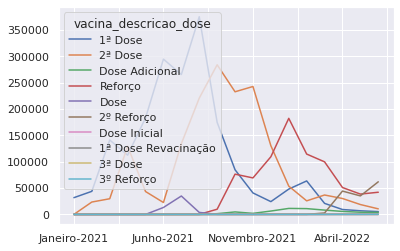

In [119]:
GO_Count_Mes_Dose.plot()

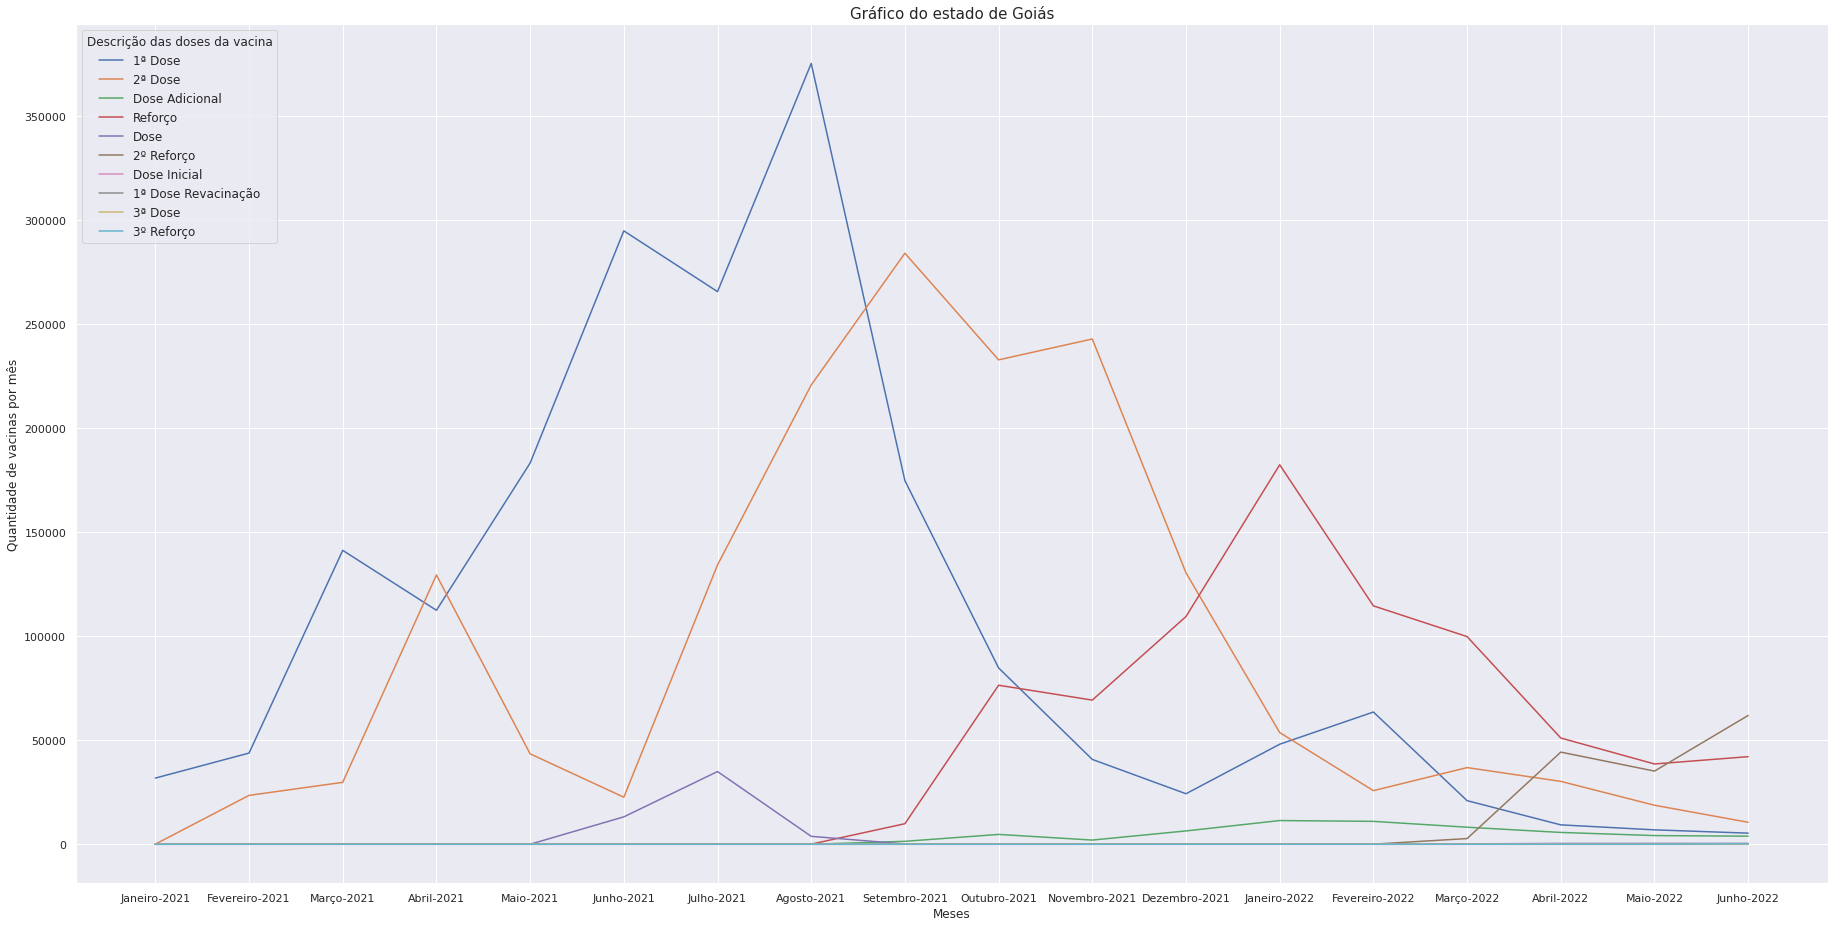

In [120]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(GO_Count_Mes_Dose)
plt.legend(['1ª Dose', '2ª Dose', 'Dose Adicional', 'Reforço','Dose','2º Reforço','Dose Inicial','1ª Dose Revacinação','3ª Dose','3º Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=12)
plt.show()

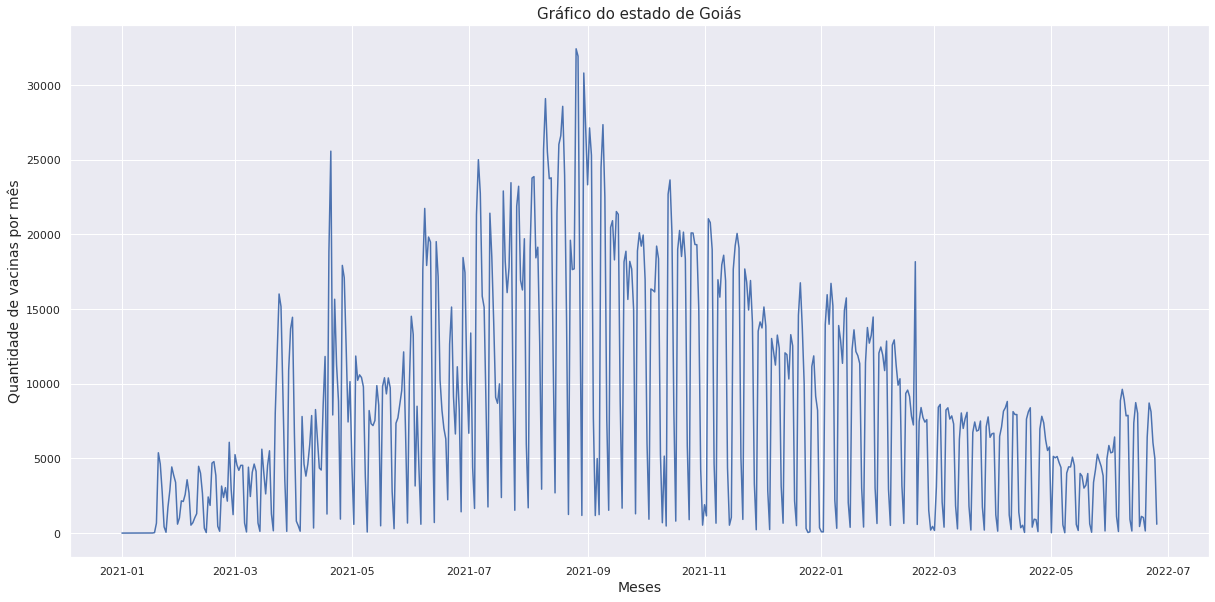

In [121]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(GO_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_GO1.groupby***

In [122]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
GO_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['1926585', '1669493','54263']
}
  
# criando outro DataFrame
GO_Vac = pd.DataFrame(GO_dataN)

In [123]:
GO_Vac['Id_qtd_dose'] = GO_Vac['Id_qtd_dose'].astype(int)

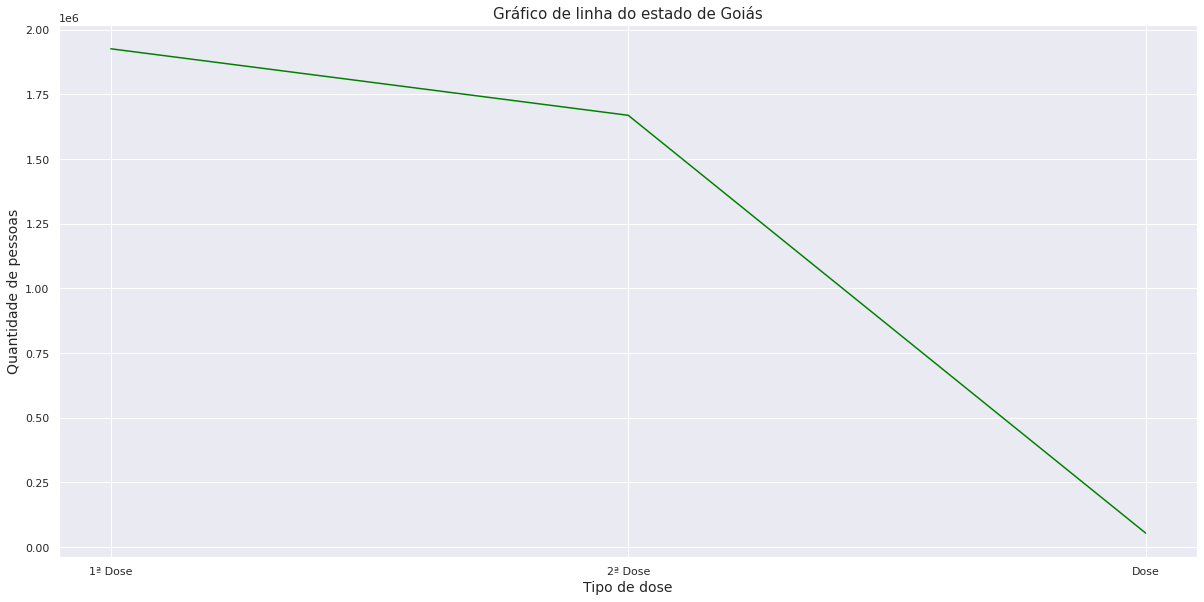

In [124]:
plt.figure(figsize=(20.4,9.8))
x = GO_Vac['vacina_descricao_dose']
y = GO_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Goiás",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

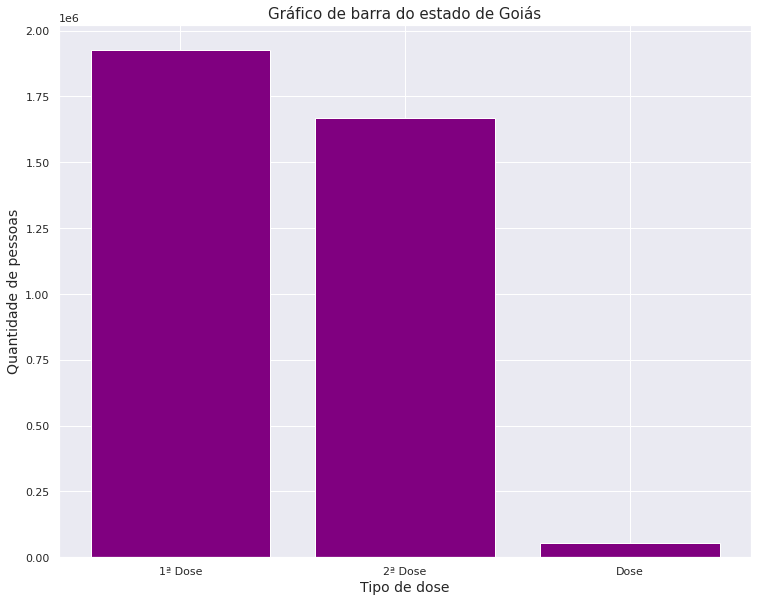

In [125]:
plt.figure(figsize=(12.4,9.8))
x = GO_Vac['vacina_descricao_dose']
y = GO_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_GO1.groupby***



In [126]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
GO_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','2ª Dose','2ª Reforço','3ª Dose','3ª Reforço','Dose','Dose Adicional','Dose Inicial','Reforço'],
    'Id_qtd_dose': ['1926585', '1', '1669493', '144185','1','256','54263','58903','1','793509']
}
  
# criando outro DataFrame
GO_Todas_Vac = pd.DataFrame(GO_dataN2)

In [127]:
GO_Todas_Vac['Id_qtd_dose'] = GO_Todas_Vac['Id_qtd_dose'].astype(int)

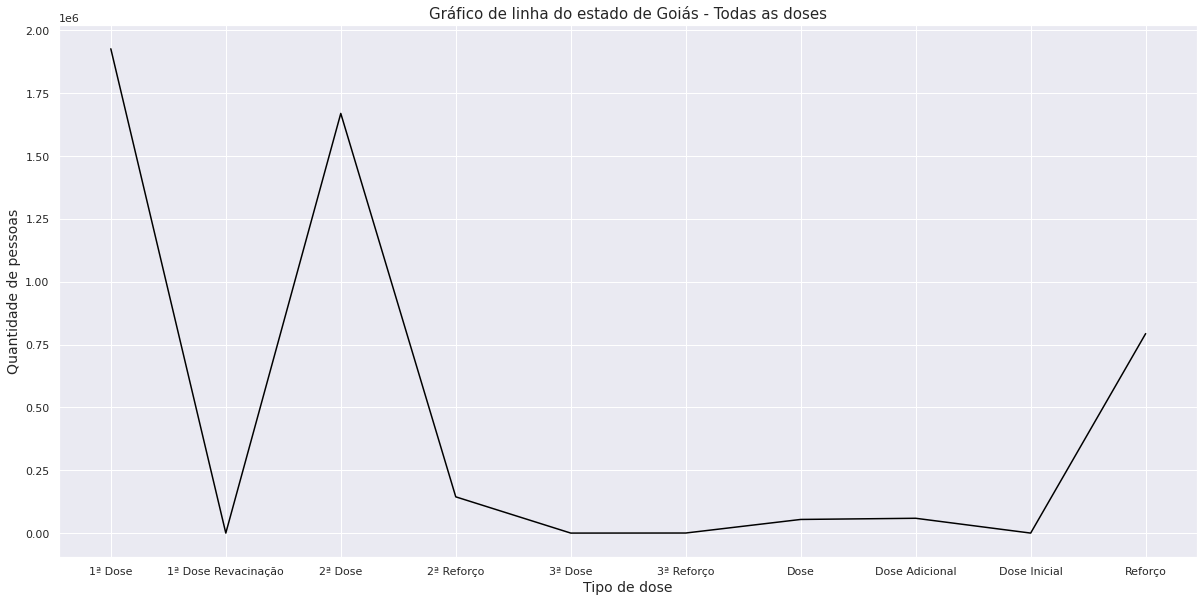

In [128]:
plt.figure(figsize=(20.4,9.8))
x = GO_Todas_Vac['vacina_descricao_dose']
y = GO_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

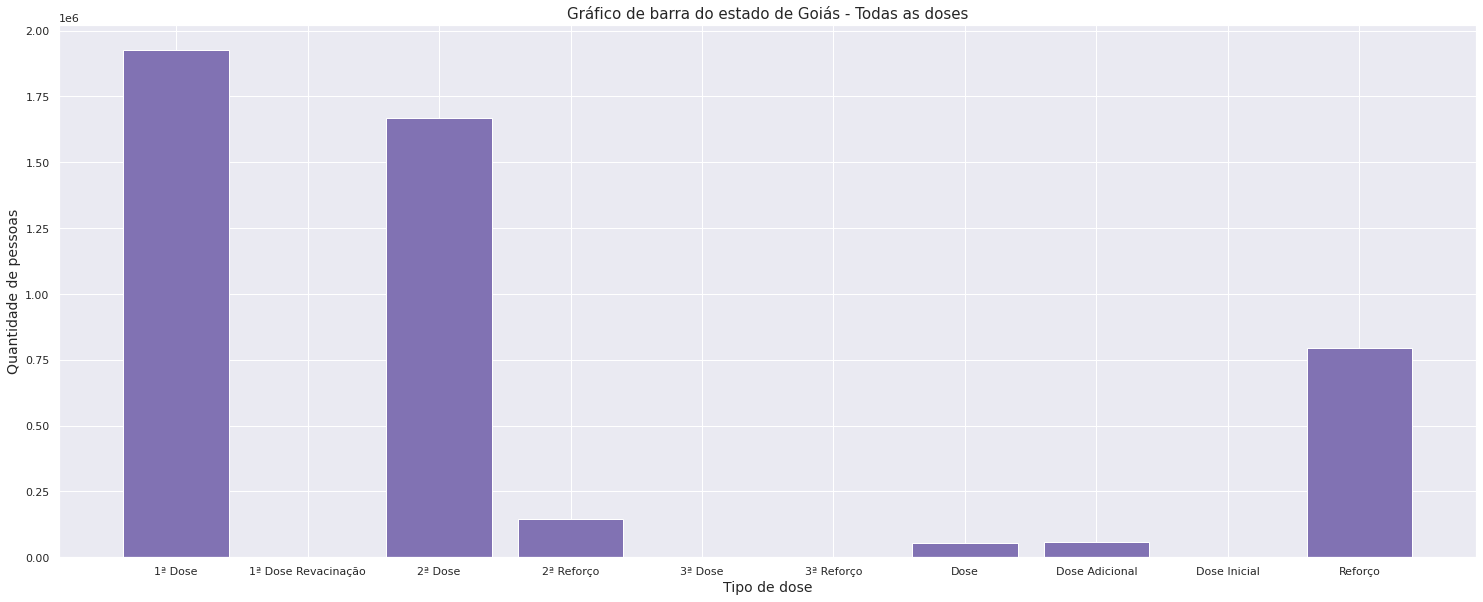

In [129]:
plt.figure(figsize=(25.4,9.8))
x = GO_Todas_Vac['vacina_descricao_dose']
y = GO_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Goiás - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

# **Gráficos - Mato Grosso**

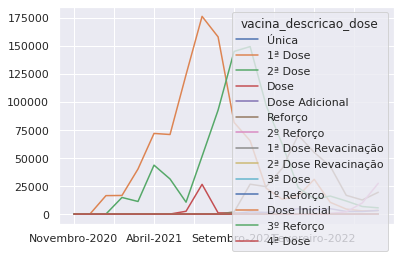

In [130]:
MT_Count_Mes_Dose.plot()

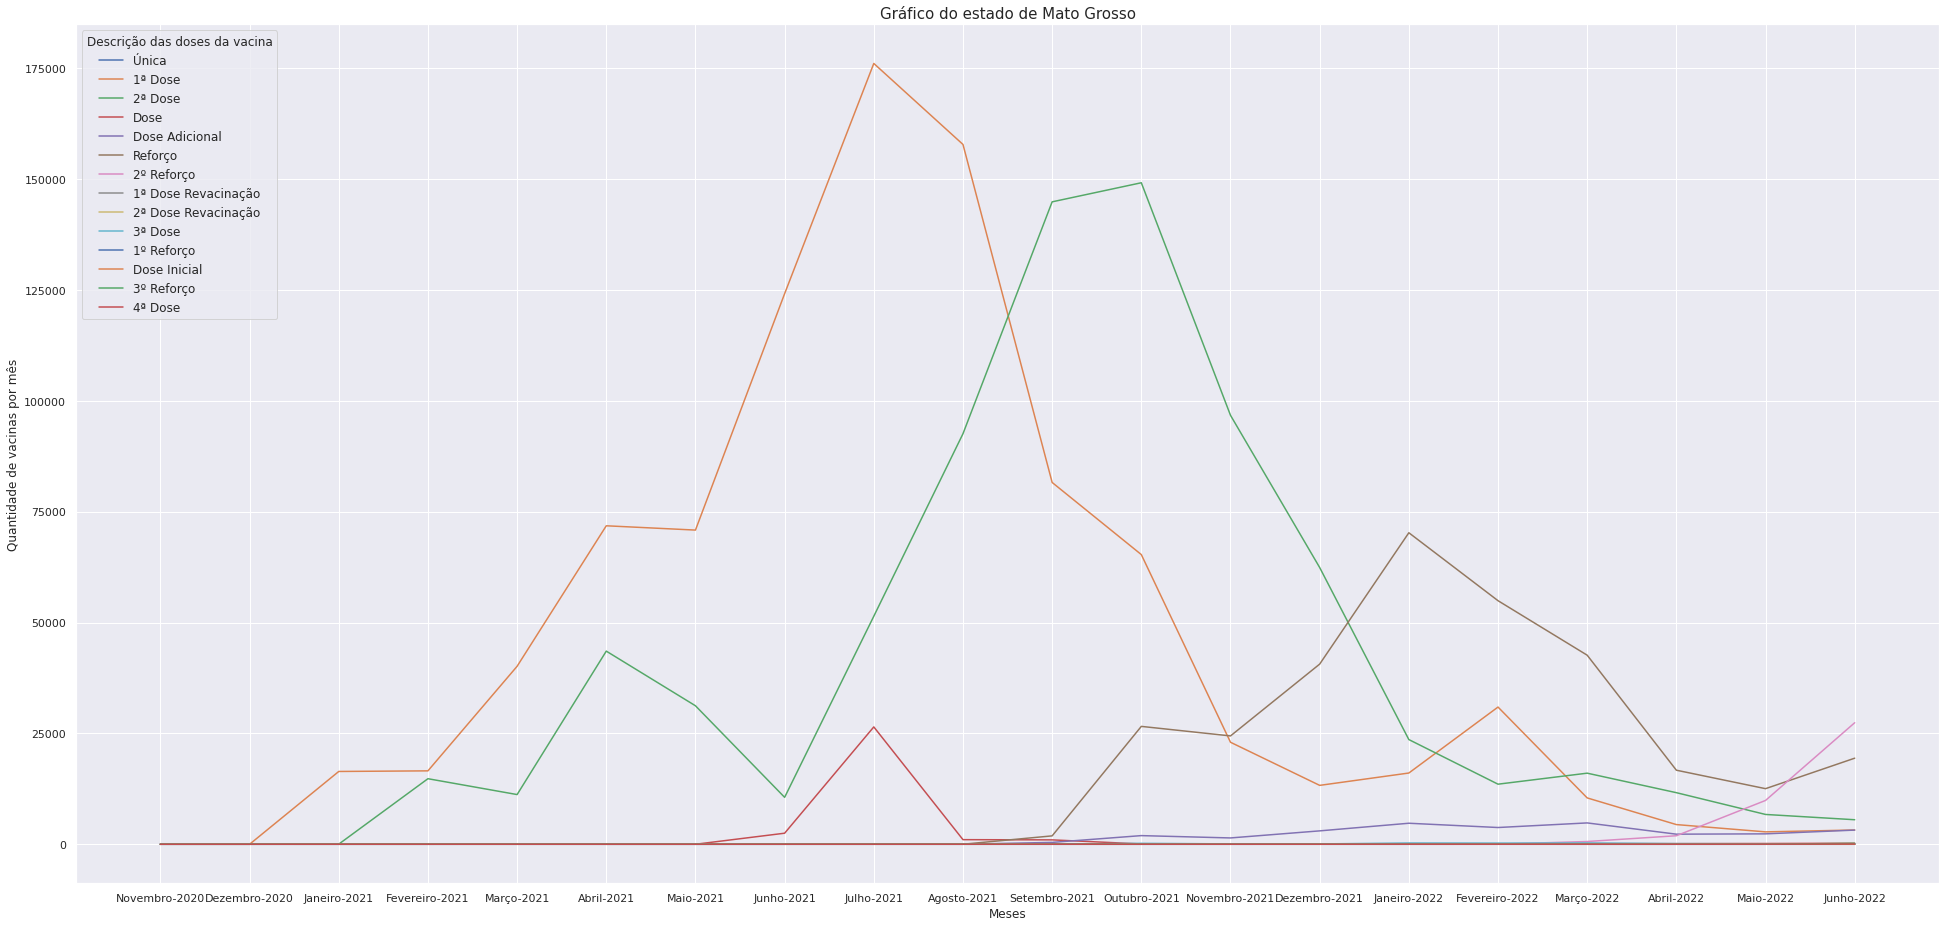

In [131]:
plt.figure(figsize=(33.4,15.8))
plt.title("Gráfico do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(MT_Count_Mes_Dose)
plt.legend(['Única','1ª Dose', '2ª Dose', 'Dose','Dose Adicional', 'Reforço','2º Reforço','1ª Dose Revacinação','2ª Dose Revacinação','3ª Dose','1º Reforço','Dose Inicial','3º Reforço','4ª Dose'], loc='upper left', title='Descrição das doses da vacina',fontsize=12)
plt.show()

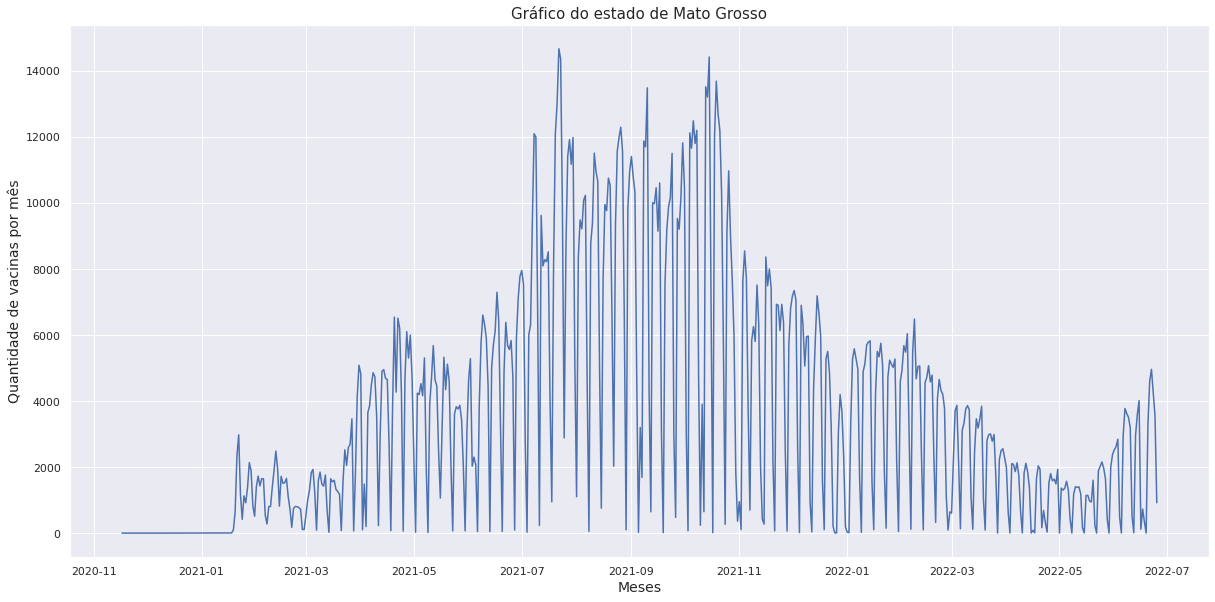

In [132]:
plt.figure(figsize=(20.4,9.8))
plt.title("Gráfico do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(MT_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_MT1.groupby***

In [133]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MT_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
MT_Vac = pd.DataFrame(MT_dataN)

In [134]:
MT_Vac['Id_qtd_dose'] = MT_Vac['Id_qtd_dose'].astype(int)

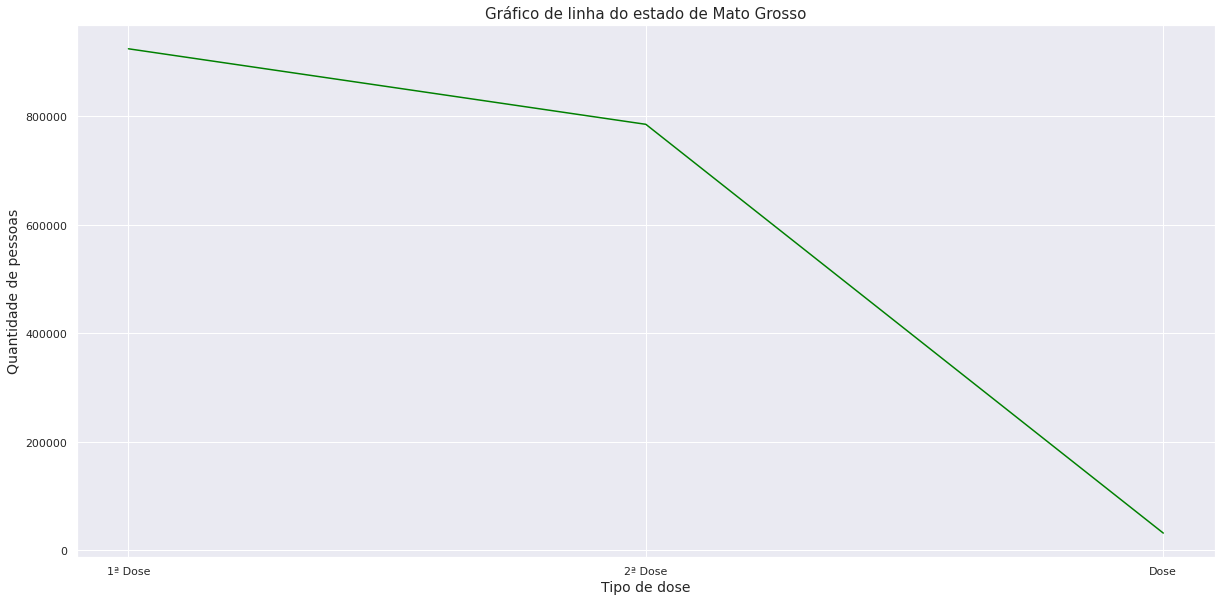

In [135]:
plt.figure(figsize=(20.4,9.8))
x = MT_Vac['vacina_descricao_dose']
y = MT_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

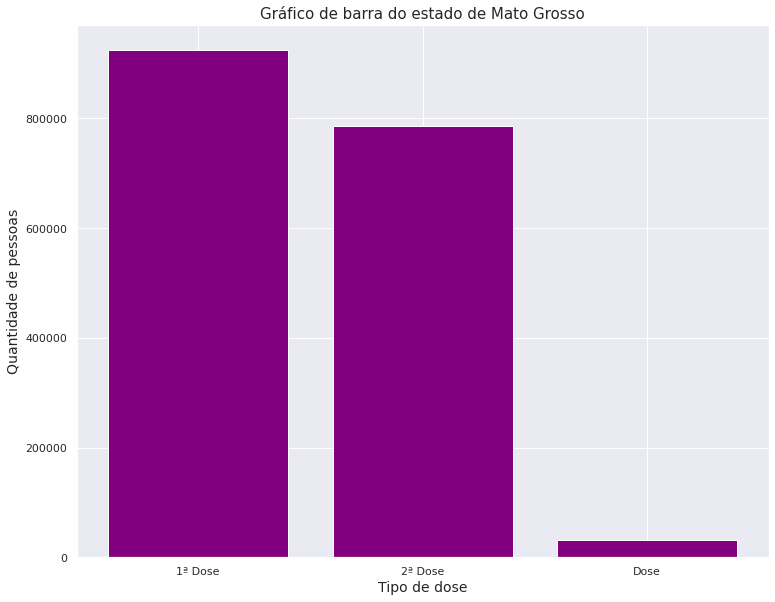

In [136]:
plt.figure(figsize=(12.4,9.8))
x = MT_Vac['vacina_descricao_dose']
y = MT_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_MT1.groupby***



In [137]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MT_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
MT_Todas_Vac = pd.DataFrame(MT_dataN2)

In [138]:
MT_Todas_Vac['Id_qtd_dose'] = MT_Todas_Vac['Id_qtd_dose'].astype(int)

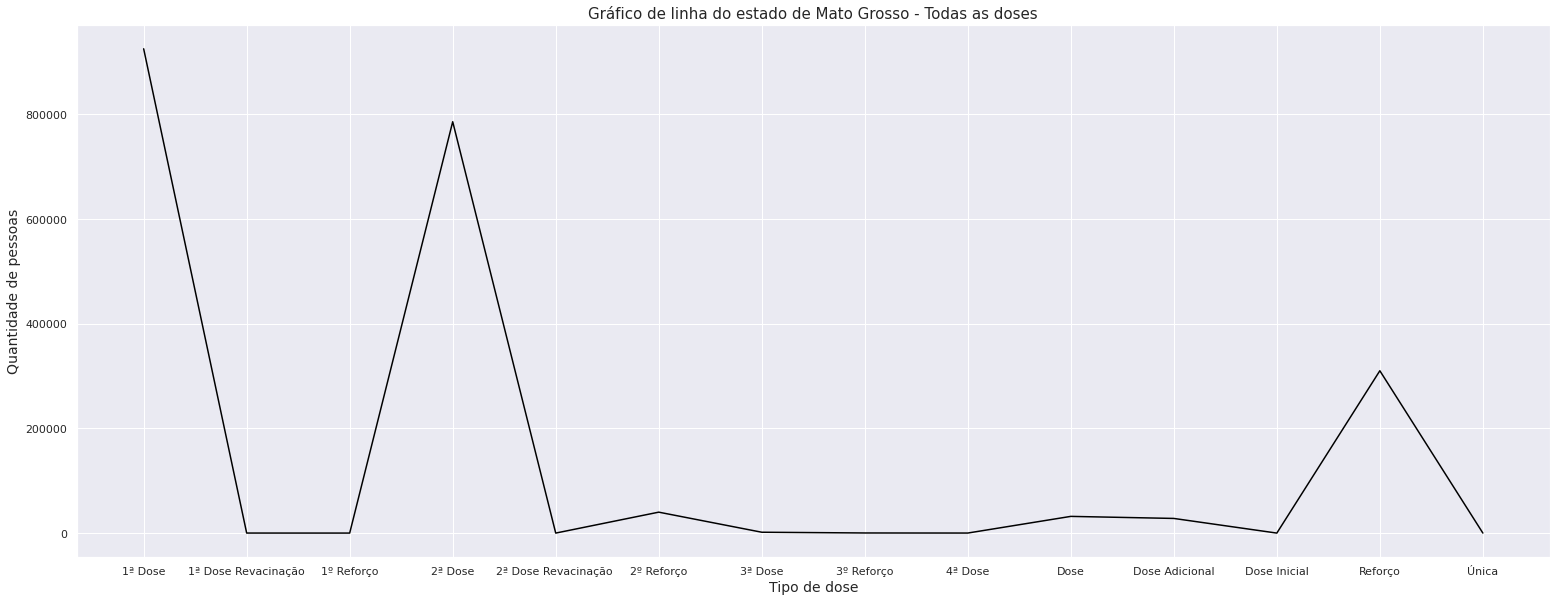

In [139]:
plt.figure(figsize=(26.4,9.8))
x = MT_Todas_Vac['vacina_descricao_dose']
y = MT_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

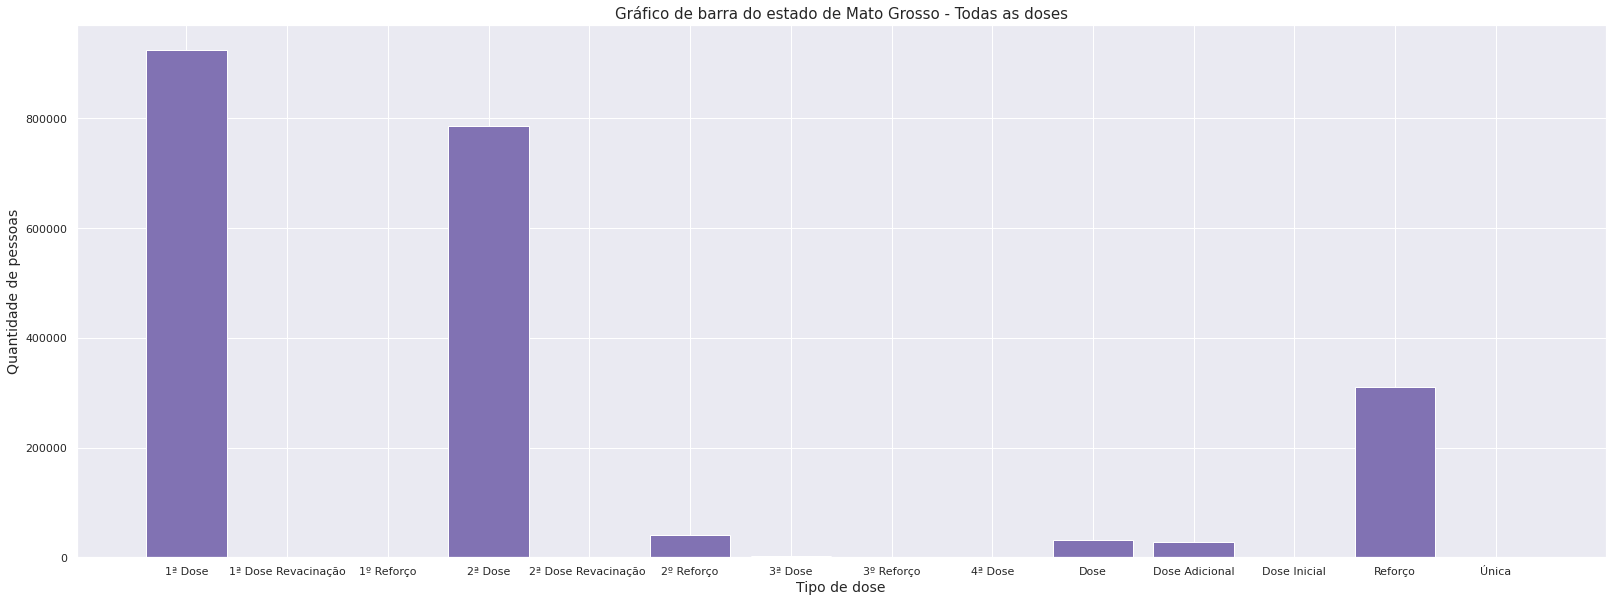

In [140]:
plt.figure(figsize=(27.4,9.8))
x = MT_Todas_Vac['vacina_descricao_dose']
y = MT_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

# **Gráficos - Mato Grosso Do Sul**

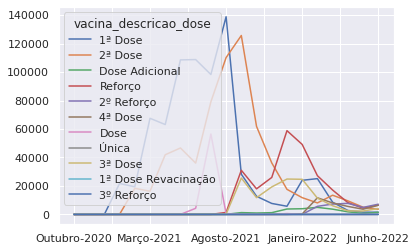

In [141]:
MS_Count_Mes_Dose.plot()

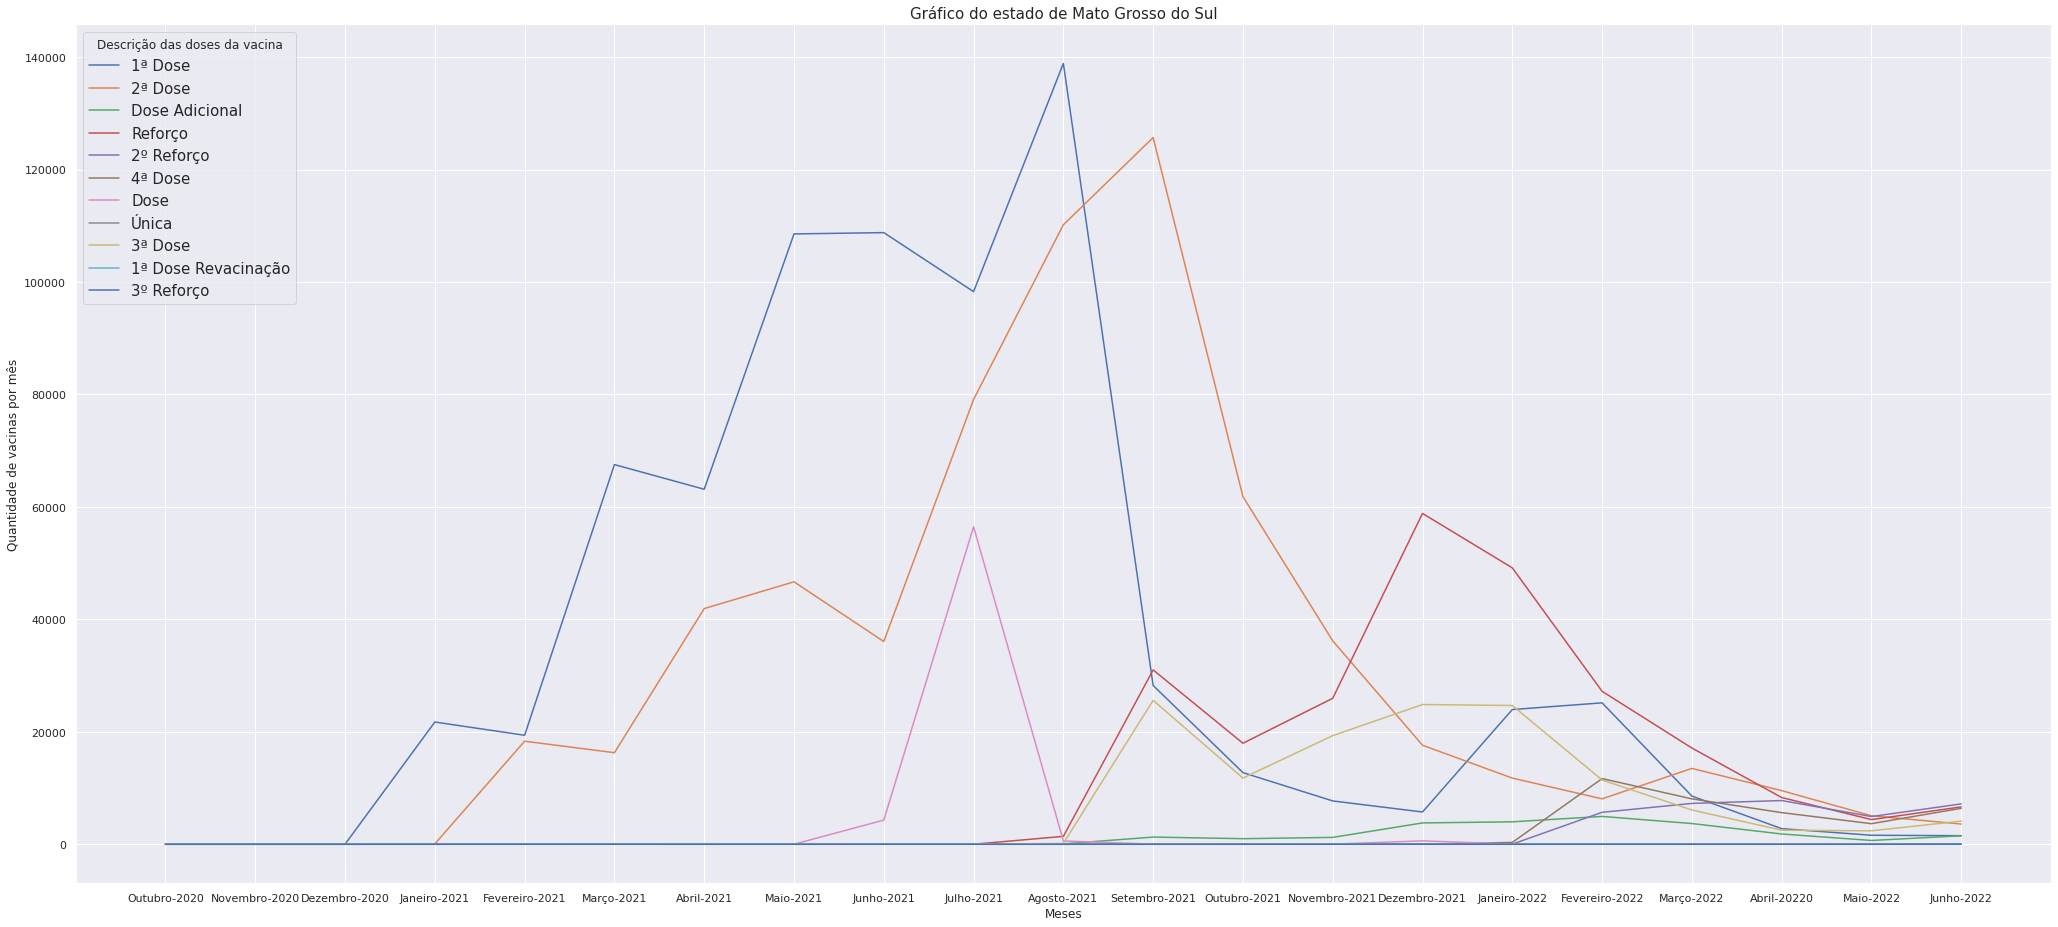

In [142]:
plt.figure(figsize=(35.4,15.8))
plt.title("Gráfico do estado de Mato Grosso do Sul",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(MS_Count_Mes_Dose)
plt.legend(['1ª Dose', '2ª Dose', 'Dose Adicional','Reforço','2º Reforço','4ª Dose','Dose','Única','3ª Dose','1ª Dose Revacinação','3º Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=15)
plt.show()

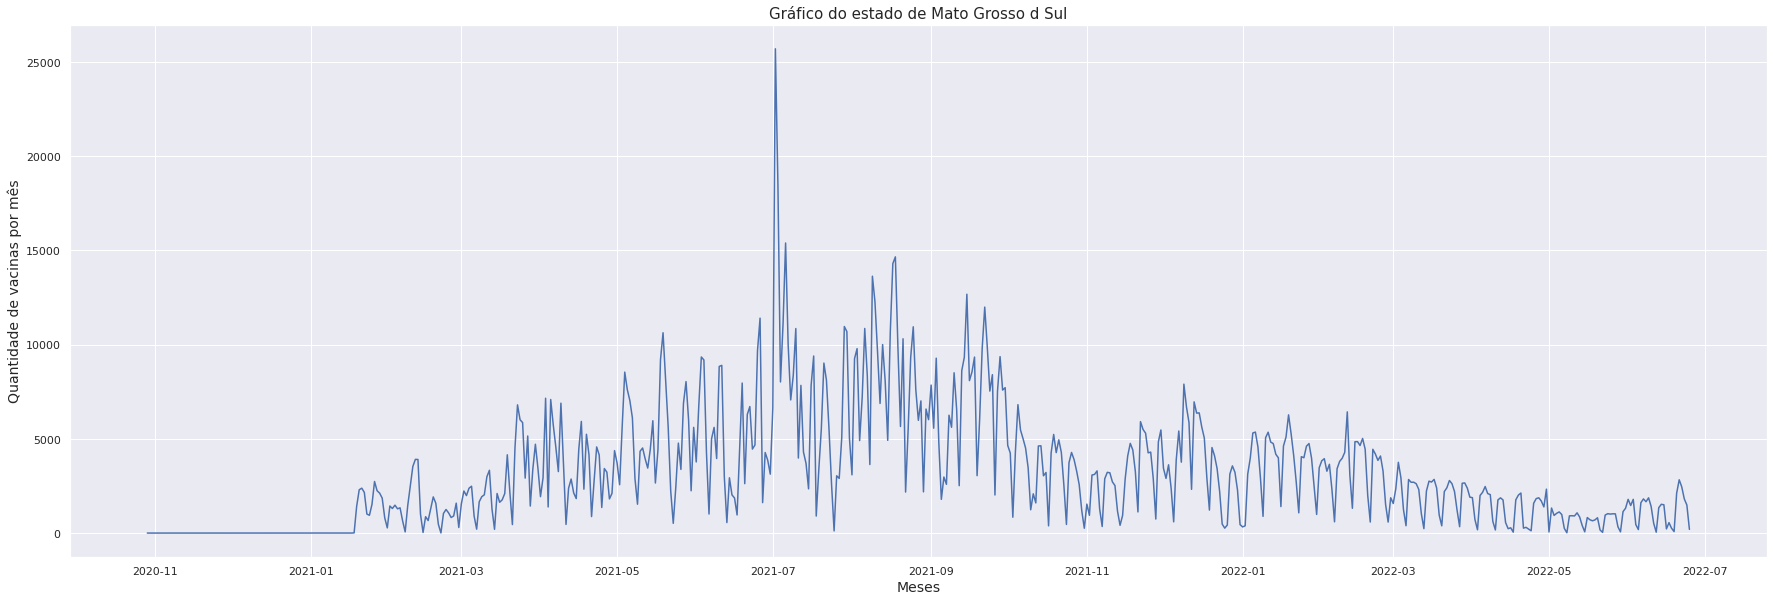

In [143]:
plt.figure(figsize=(30.4,9.8))
plt.title("Gráfico do estado de Mato Grosso d Sul",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(MS_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_MS1.groupby***

In [144]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MS_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
MS_Vac = pd.DataFrame(MS_dataN)

In [145]:
MS_Vac['Id_qtd_dose'] = MS_Vac['Id_qtd_dose'].astype(int)

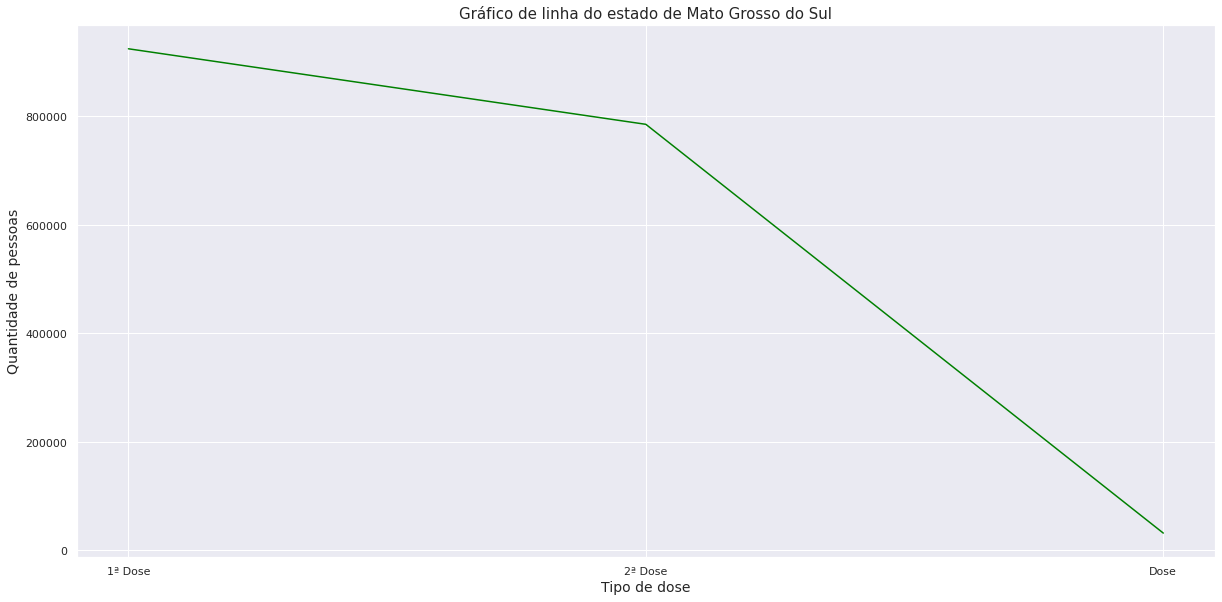

In [146]:
plt.figure(figsize=(20.4,9.8))
x = MS_Vac['vacina_descricao_dose']
y = MS_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso do Sul",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

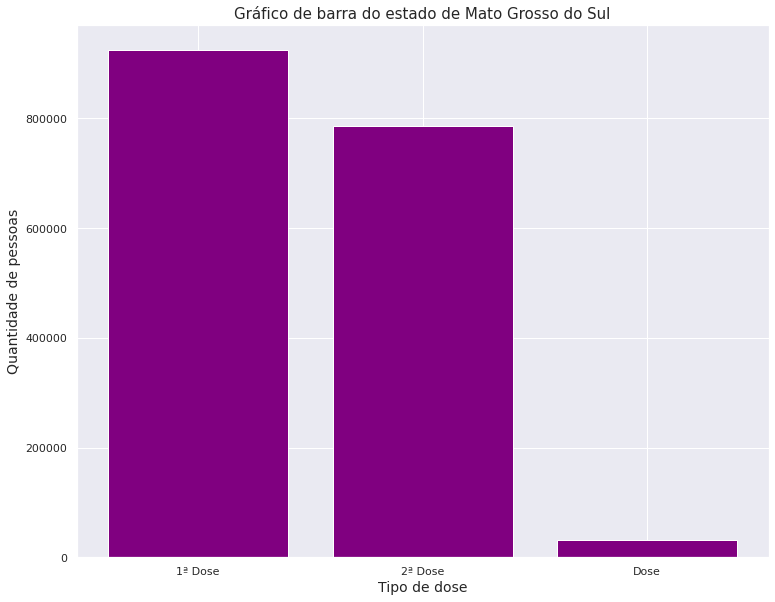

In [147]:
plt.figure(figsize=(12.4,9.8))
x = MS_Vac['vacina_descricao_dose']
y = MS_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso do Sul",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_MS1.groupby***



In [148]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
MS_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
MS_Todas_Vac = pd.DataFrame(MS_dataN2)

In [149]:
MS_Todas_Vac['Id_qtd_dose'] = MS_Todas_Vac['Id_qtd_dose'].astype(int)

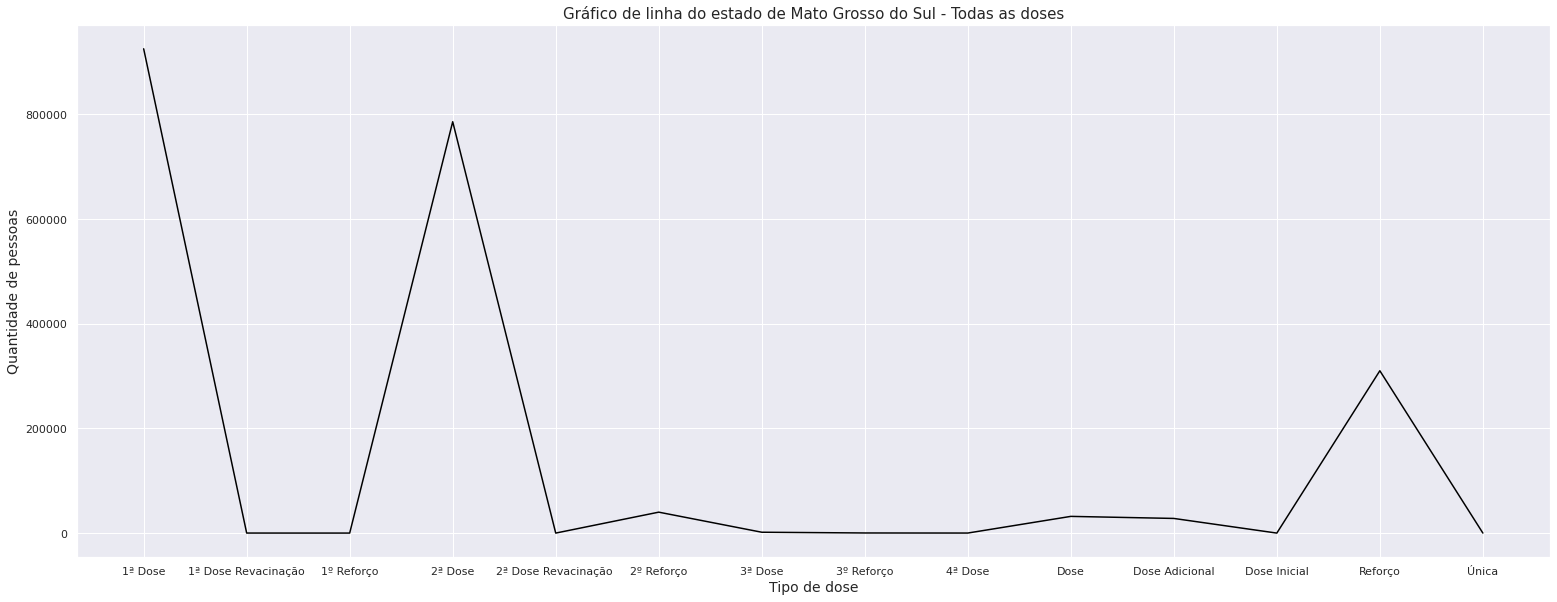

In [150]:
plt.figure(figsize=(26.4,9.8))
x = MS_Todas_Vac['vacina_descricao_dose']
y = MS_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do estado de Mato Grosso do Sul - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

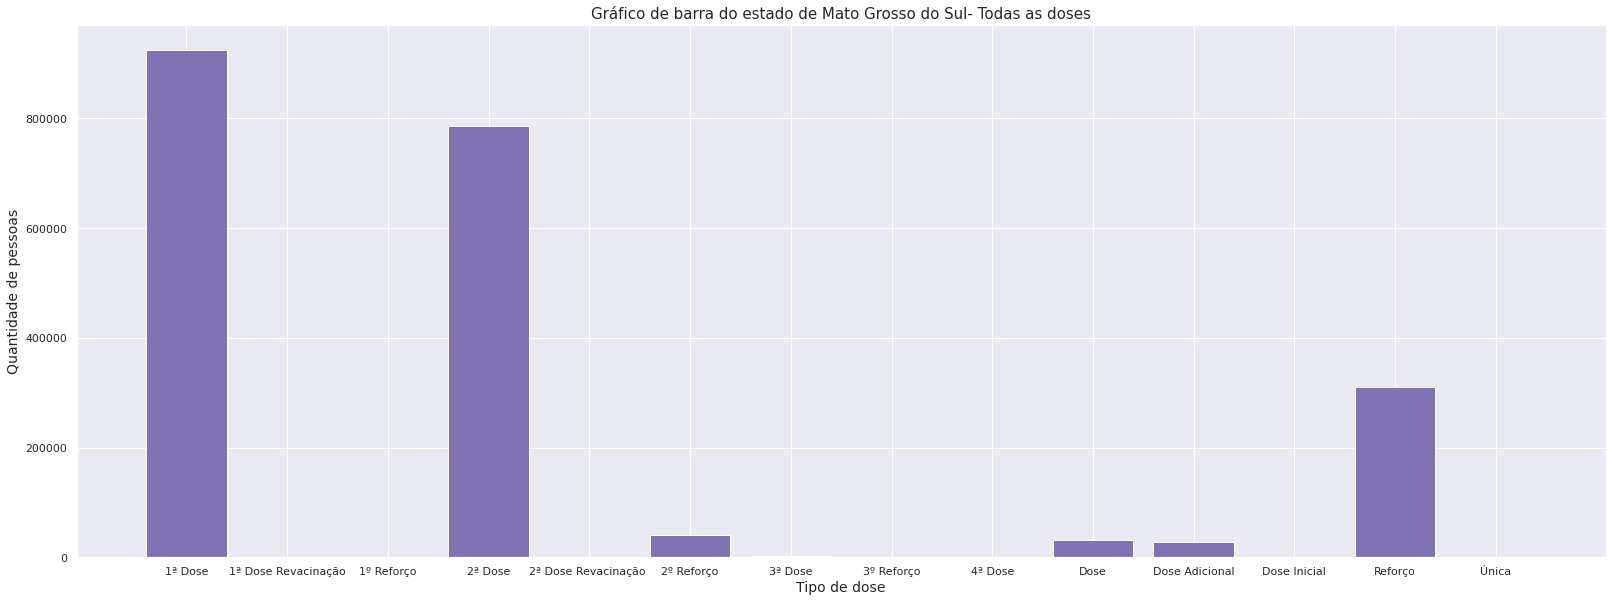

In [151]:
plt.figure(figsize=(27.4,9.8))
x = MS_Todas_Vac['vacina_descricao_dose']
y = MS_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do estado de Mato Grosso do Sul- Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()

#**Gráficos - Distrito Federal**

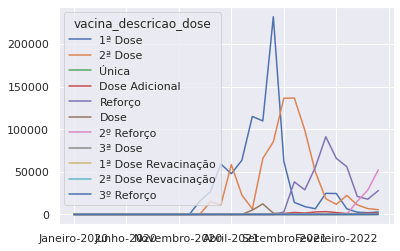

In [152]:
DF_Count_Mes_Dose.plot()

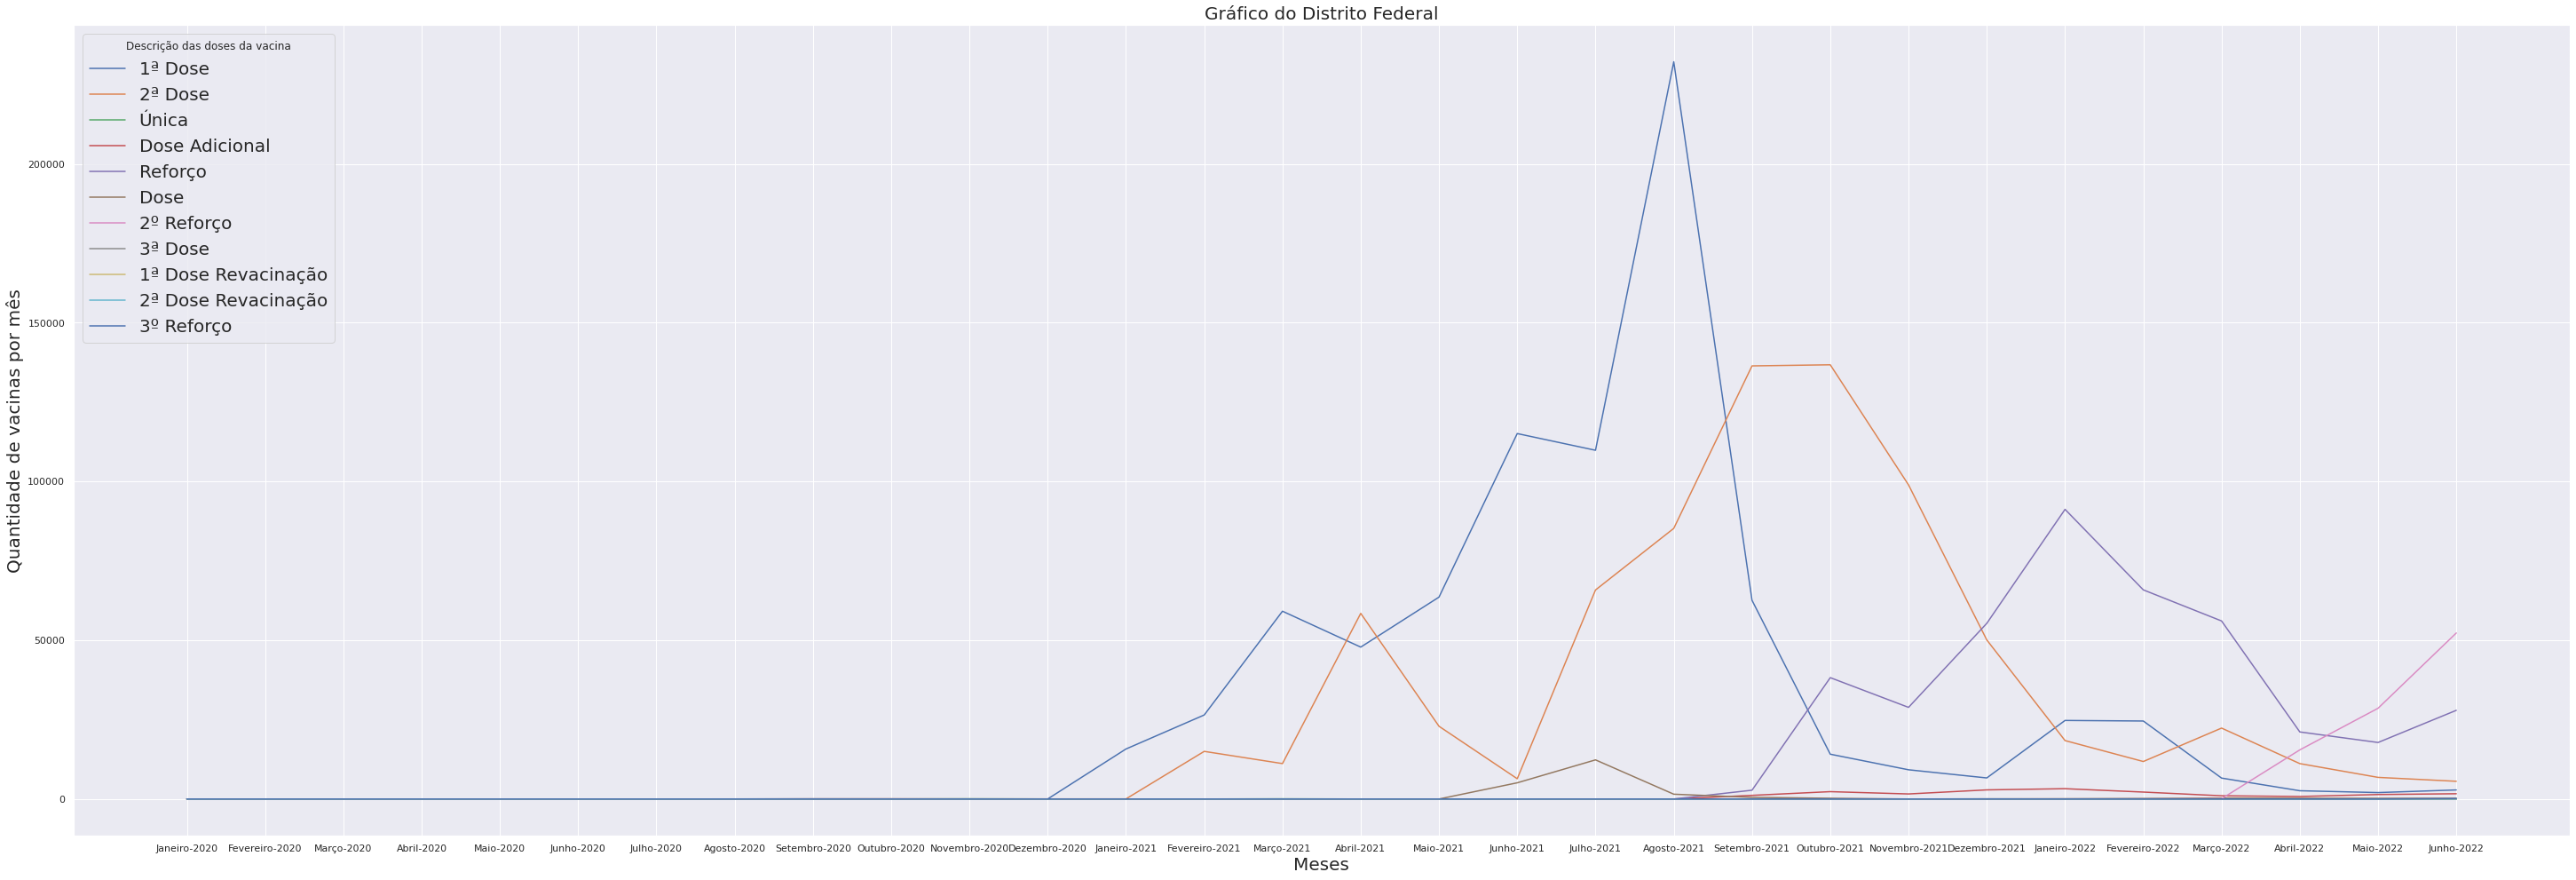

In [170]:
plt.figure(figsize=(50.4,16.8))
plt.title("Gráfico do Distrito Federal",fontsize=20)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 20)
plt.xlabel('Meses',fontsize = 20)
plt.plot(DF_Count_Mes_Dose)
plt.legend(['1ª Dose', '2ª Dose','Única','Dose Adicional', 'Reforço','Dose','2º Reforço','3ª Dose','1ª Dose Revacinação','2ª Dose Revacinação','3º Reforço'], loc='upper left', title='Descrição das doses da vacina',fontsize=20)
plt.show()

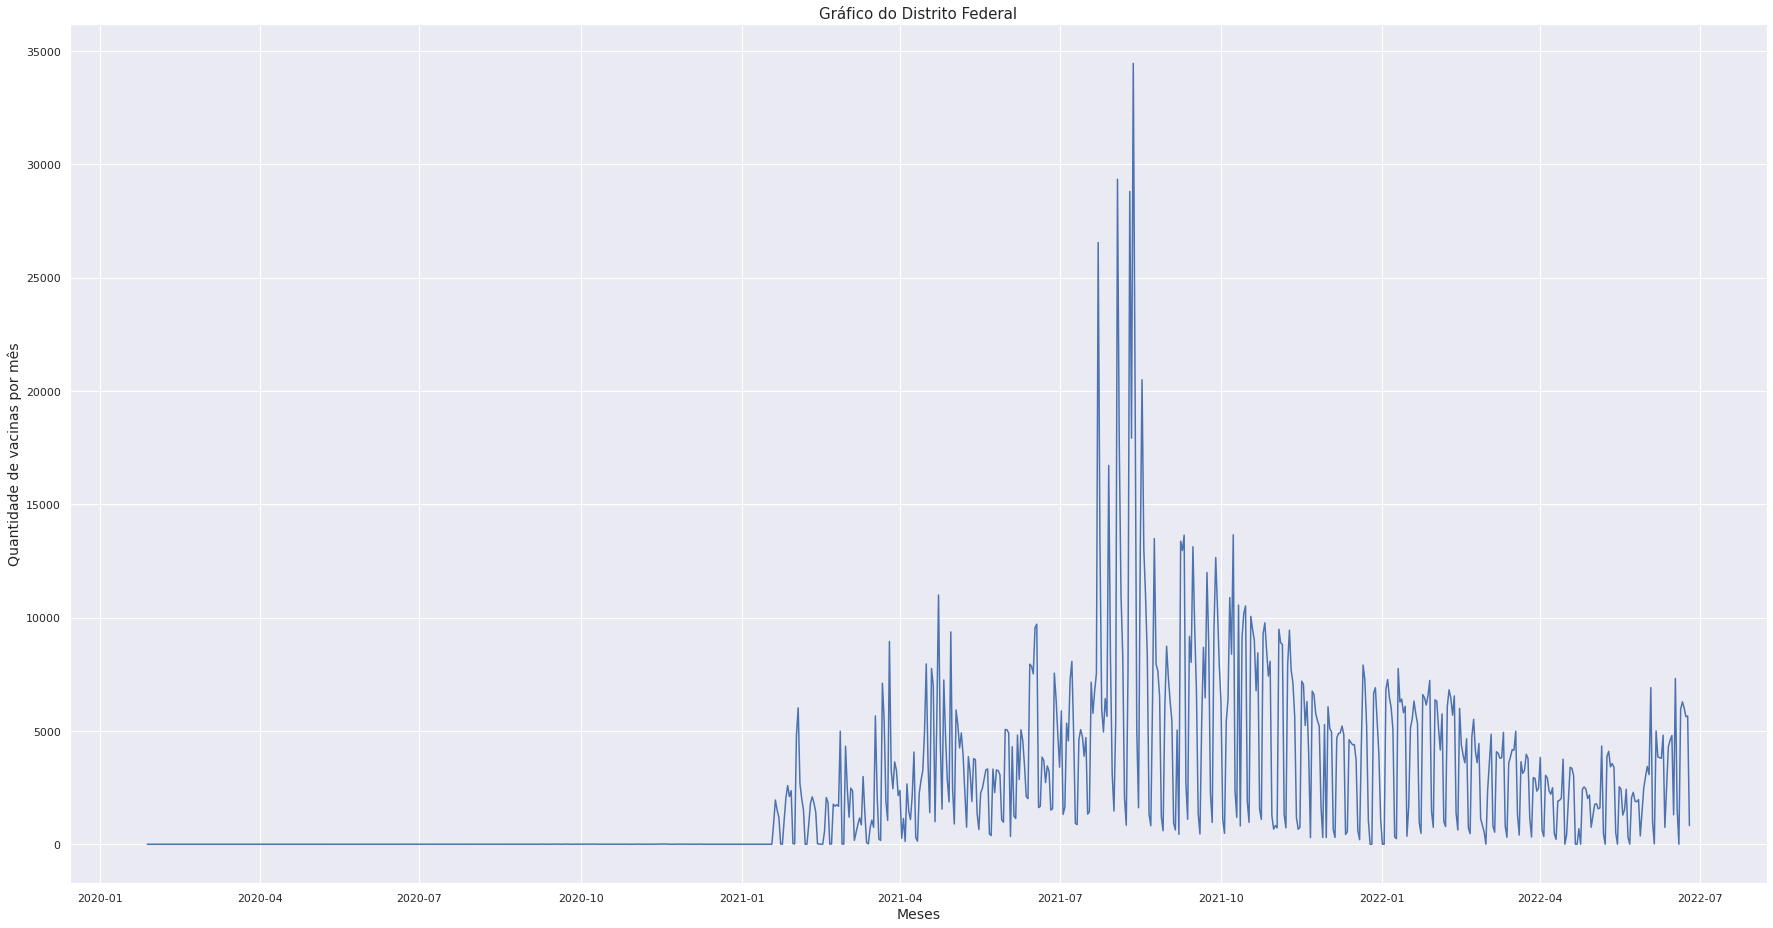

In [172]:
plt.figure(figsize=(30.4,15.8))
plt.title("Gráfico do Distrito Federal",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(DF_Count_Mes)
plt.show()

***> Gráficos com 1ª, 2ª e dose única do df_DF1.groupby***

In [155]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
DF_dataN = {
    'vacina_descricao_dose': ['1ª Dose','2ª Dose','Dose'],
    'Id_qtd_dose': ['924849', '785579','31898']
}
  
# criando outro DataFrame
DF_Vac = pd.DataFrame(DF_dataN)

In [156]:
DF_Vac['Id_qtd_dose'] = DF_Vac['Id_qtd_dose'].astype(int)

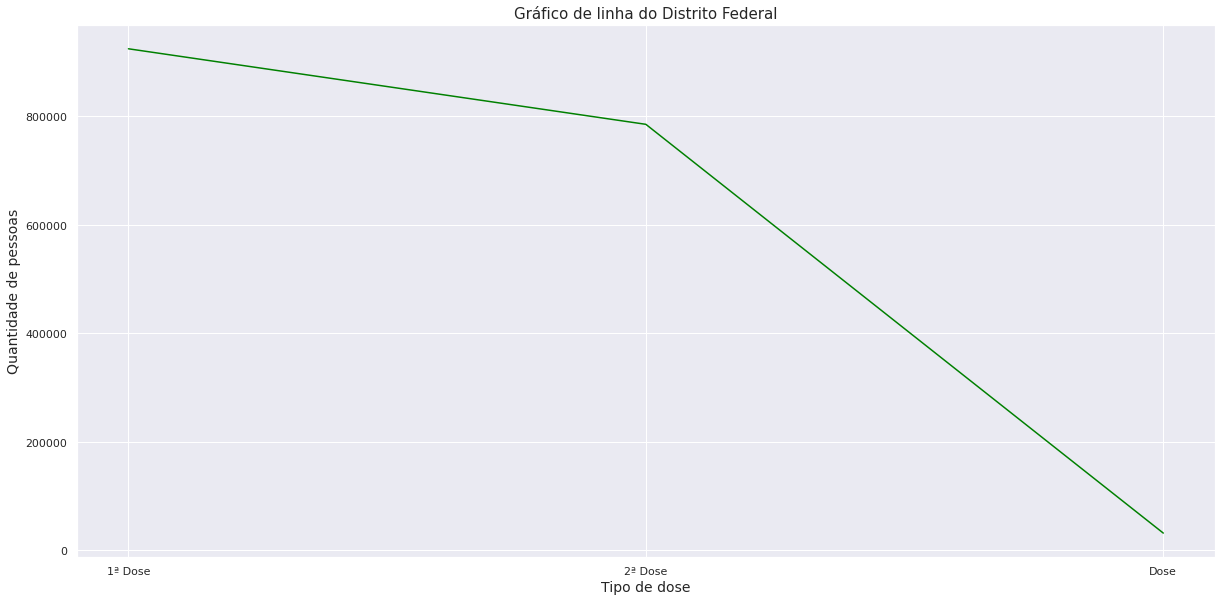

In [157]:
plt.figure(figsize=(20.4,9.8))
x = DF_Vac['vacina_descricao_dose']
y = DF_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do Distrito Federal",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='green')
plt.show()

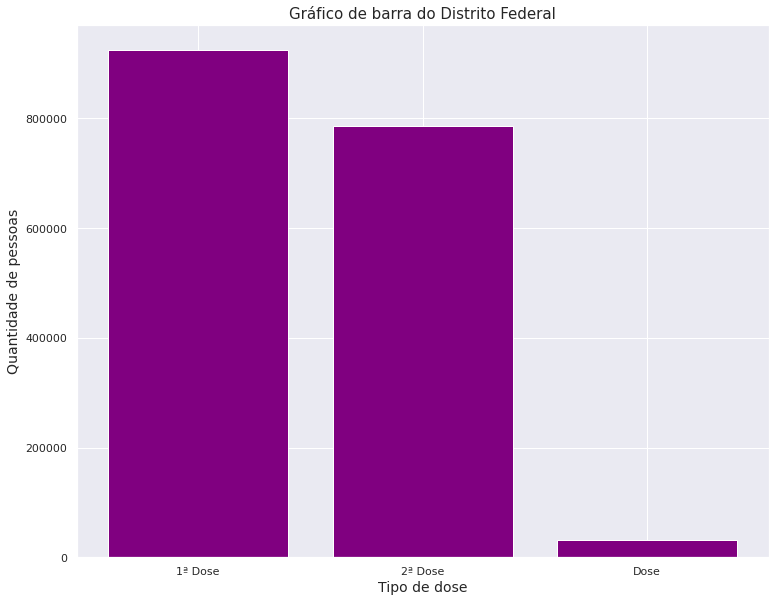

In [158]:
plt.figure(figsize=(12.4,9.8))
x = DF_Vac['vacina_descricao_dose']
y = DF_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do Distrito Federal",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'purple')
plt.show()



> ***Gráficos com todos os dados do df_DF1.groupby***



In [159]:
# Colocando em um DataFrame as informaçoes da quantidade de pacientes por tipo de vacina
DF_dataN2 = {
    'vacina_descricao_dose': ['1ª Dose','1ª Dose Revacinação','1º Reforço','2ª Dose','2ª Dose Revacinação ','2º Reforço','3ª Dose','3º Reforço','4ª Dose','Dose','Dose Adicional','Dose Inicial','Reforço','Única'],
    'Id_qtd_dose': ['924849', '67', '25','785579','3','39965','1631','214','73','31898','27973','1','309999','64']
}
  
# criando outro DataFrame
DF_Todas_Vac = pd.DataFrame(DF_dataN2)

In [160]:
DF_Todas_Vac['Id_qtd_dose'] = DF_Todas_Vac['Id_qtd_dose'].astype(int)

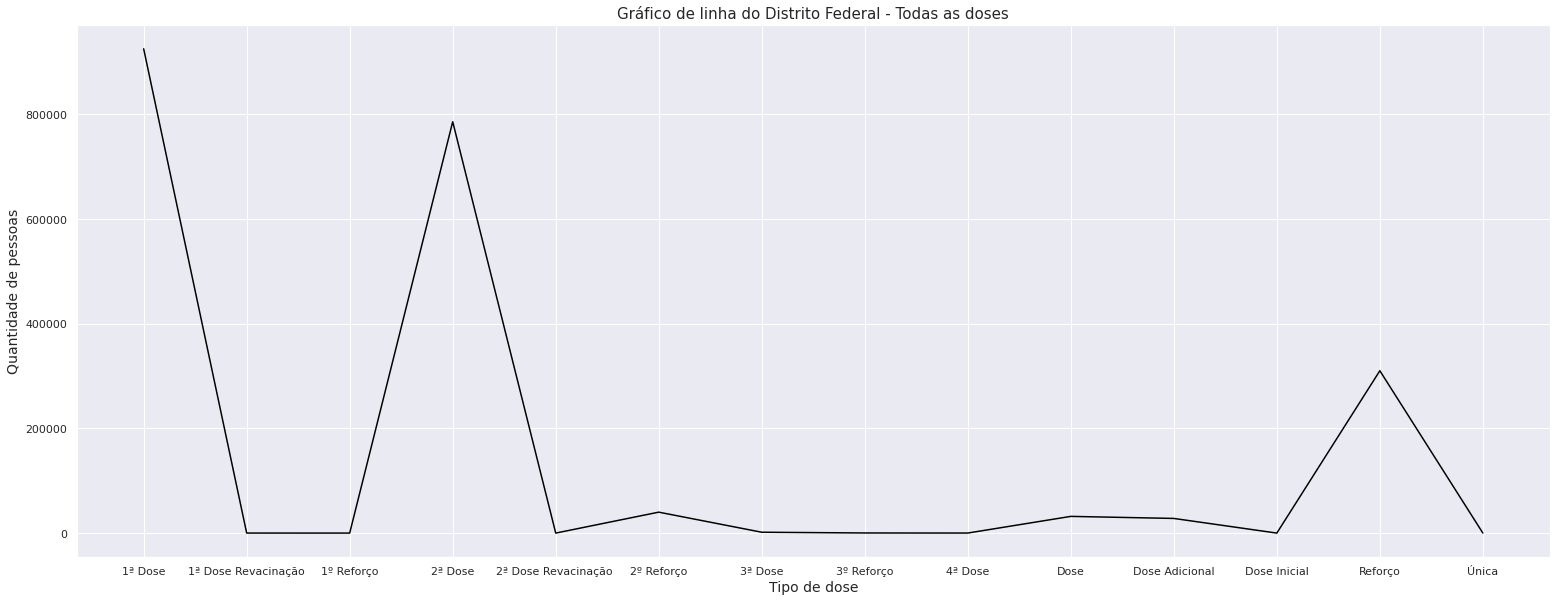

In [161]:
plt.figure(figsize=(26.4,9.8))
x = DF_Todas_Vac['vacina_descricao_dose']
y = DF_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de linha do Distrito Federal - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.plot(x,y,color='black')
plt.show()

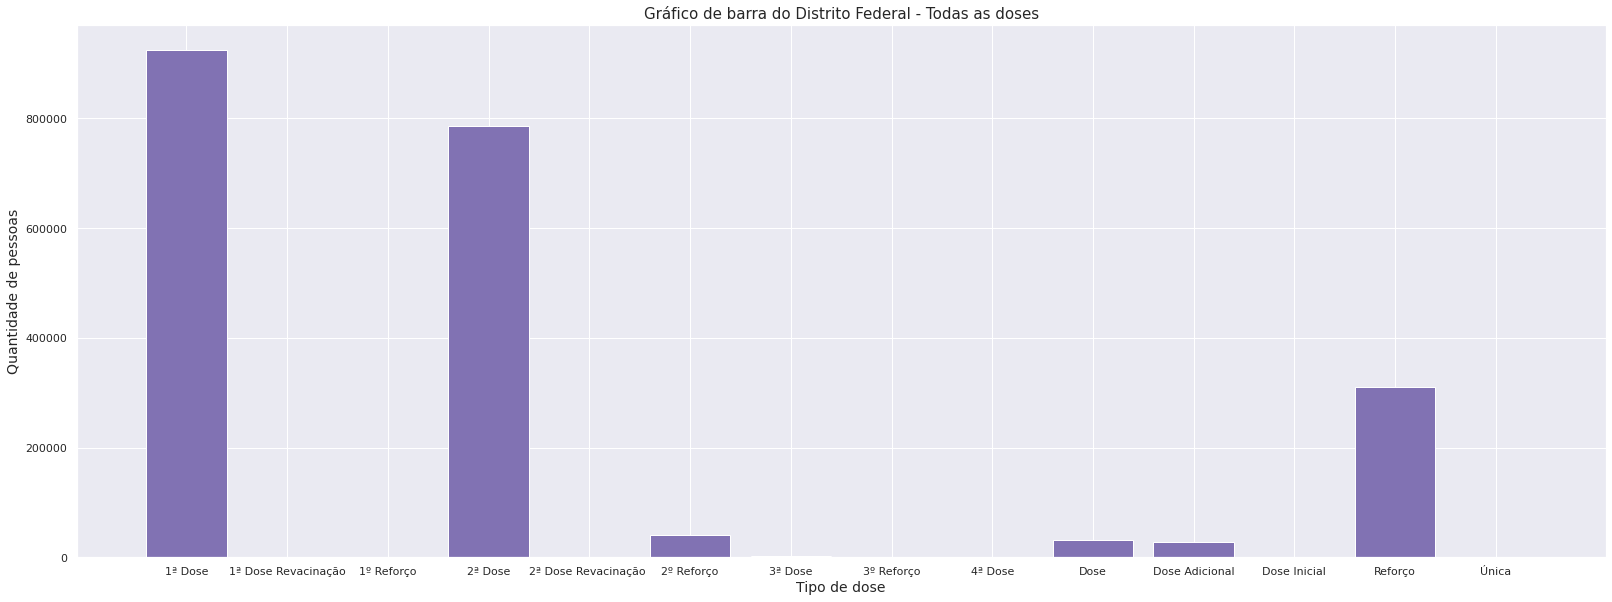

In [162]:
plt.figure(figsize=(27.4,9.8))
x = DF_Todas_Vac['vacina_descricao_dose']
y = DF_Todas_Vac['Id_qtd_dose']
plt.title("Gráfico de barra do Distrito Federal - Todas as doses",fontsize=15)
plt.xlabel("Tipo de dose",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.bar(x,y,color = 'm')
plt.show()